# **Semester project: Bird Species Classification**
Réalisé par Mohamed Elyes Maalel / Donia Tekaya/ Mohamed Aziz Marouani

In [1]:
import gdown
import zipfile
import os

# Lien du fichier partagé
file_url = "https://drive.google.com/uc?id=1IEnpbGjNqXYF4vPY1NW-ODcrYZomyb4S"

# Télécharger le fichier
output = "dataset.zip"
gdown.download(file_url, output, quiet=False)

# Extraire le fichier ZIP
with zipfile.ZipFile(output, 'r') as zip_ref:
    zip_ref.extractall("dataset")

# Vérifier le contenu du dossier extrait
print("Contenu du dossier :")
print(os.listdir("dataset"))


Downloading...
From (original): https://drive.google.com/uc?id=1IEnpbGjNqXYF4vPY1NW-ODcrYZomyb4S
From (redirected): https://drive.google.com/uc?id=1IEnpbGjNqXYF4vPY1NW-ODcrYZomyb4S&confirm=t&uuid=c711c507-7674-4924-bb10-66ccd9c79292
To: /content/dataset.zip
100%|██████████| 310M/310M [00:03<00:00, 87.1MB/s]


Contenu du dossier :
['dataset', '__MACOSX']


# **Mapping**

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import transforms
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import models

# Chemins

class_indexes_path = "/content/dataset/dataset/class_indexes.csv"
train_dir = "/content/dataset/dataset/train_images"
val_dir = "/content/dataset/dataset/val_images"

# Charger le fichier class_indexes.csv
class_indexes = pd.read_csv(class_indexes_path)

# Créer un dictionnaire pour mapper les noms de classes aux indices
class_to_idx_mapping = {row['category_cub']: row['idx'] for _, row in class_indexes.iterrows()}

# Transformation des images (
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Redimensionnement à 224x224
    transforms.ToTensor()          # Convertir en tenseur
])

# Dataset personnalisé
class CustomDataset:
    def __init__(self, root_dir, class_to_idx, transform=None):
        self.root_dir = root_dir
        self.class_to_idx = class_to_idx
        self.transform = transform
        self.samples = []

        # Parcourir les sous-dossiers et collecter les chemins des images et leurs labels
        for class_name, class_idx in class_to_idx.items():
            class_dir = os.path.join(root_dir, class_name)
            if not os.path.isdir(class_dir):
                continue
            for img_name in os.listdir(class_dir):
                img_path = os.path.join(class_dir, img_name)
                self.samples.append((img_path, class_idx))

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        img_path, label = self.samples[idx]
        img = Image.open(img_path).convert("RGB")
        if self.transform:
            img = self.transform(img)
        return img, label

# Charger les datasets
train_dataset = CustomDataset(train_dir, class_to_idx_mapping, transform=transform)
val_dataset = CustomDataset(val_dir, class_to_idx_mapping, transform=transform)

# Affichage des informations
print(f"Nombre d'images dans train_dataset : {len(train_dataset)}")
print(f"Nombre d'images dans val_dataset : {len(val_dataset)}")

# Fonction pour visualiser les images d'un label spécifique
def visualize_by_label(dataset, label_to_display, num_images=5):
    """
    Visualise les images correspondant à un label spécifique dans un dataset.

    Args:
    - dataset : Le dataset contenant les images et les labels.
    - label_to_display : Le label spécifique (numérique) à afficher.
    - num_images : Nombre d'images à afficher.
    """
    # Filtrer les images correspondant au label spécifié
    indices = [i for i, (_, label) in enumerate(dataset.samples) if label == label_to_display]

    if not indices:
        print(f"Aucune image trouvée pour le label {label_to_display}.")
        return

    # Limiter le nombre d'images à afficher
    indices = indices[:num_images]

    fig, axes = plt.subplots(1, len(indices), figsize=(20, 5))
    for ax, idx in zip(axes, indices):
        img, label = dataset[idx]
        img = img.permute(1, 2, 0).numpy()  # Reformatage pour matplotlib
        class_name = [k for k, v in dataset.class_to_idx.items() if v == label][0]
        ax.imshow(img)
        ax.set_title(f"Label: {label}\nClass: {class_name}")
        ax.axis("off")
    plt.tight_layout()
    plt.show()





Nombre d'images dans train_dataset : 1525
Nombre d'images dans val_dataset : 270


## Visualisation des Photos avec le Label 2 dans Train et Validation

Pour mieux comprendre les données, nous allons visualiser quelques images associées au label **2** dans les ensembles **train** et **validation**.




train Dataset :


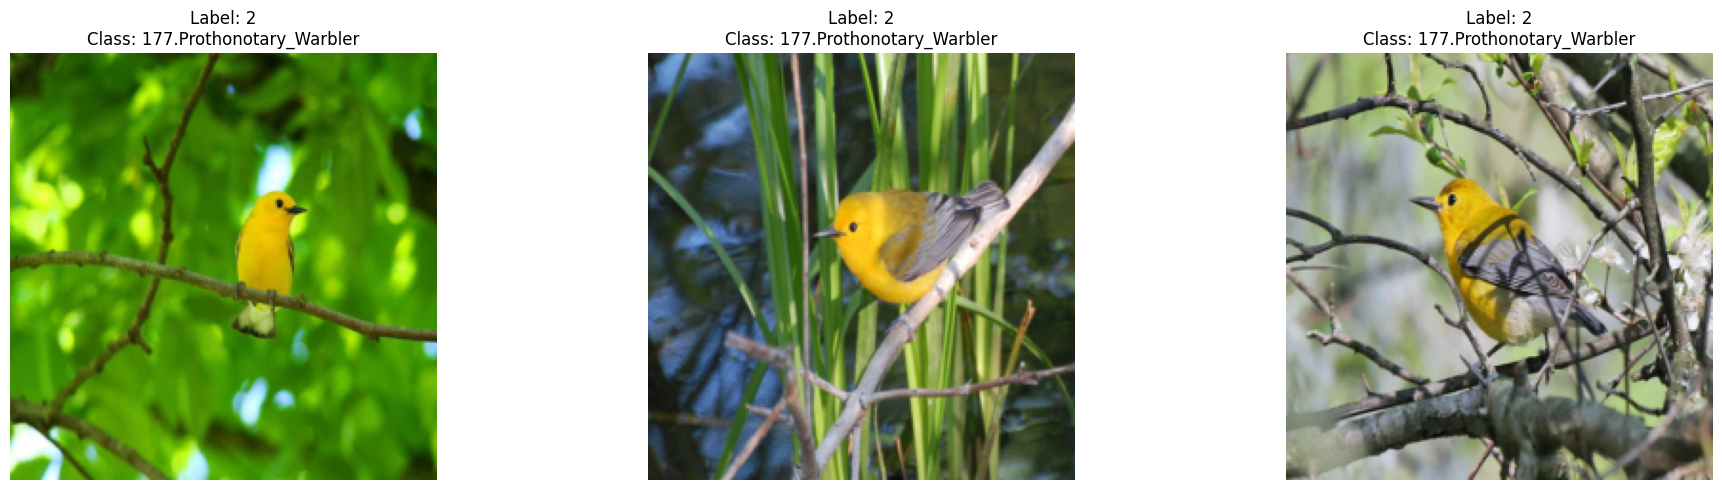

In [ ]:
print('train Dataset :')
visualize_by_label(train_dataset, label_to_display=2, num_images=3)

Test Dataset :


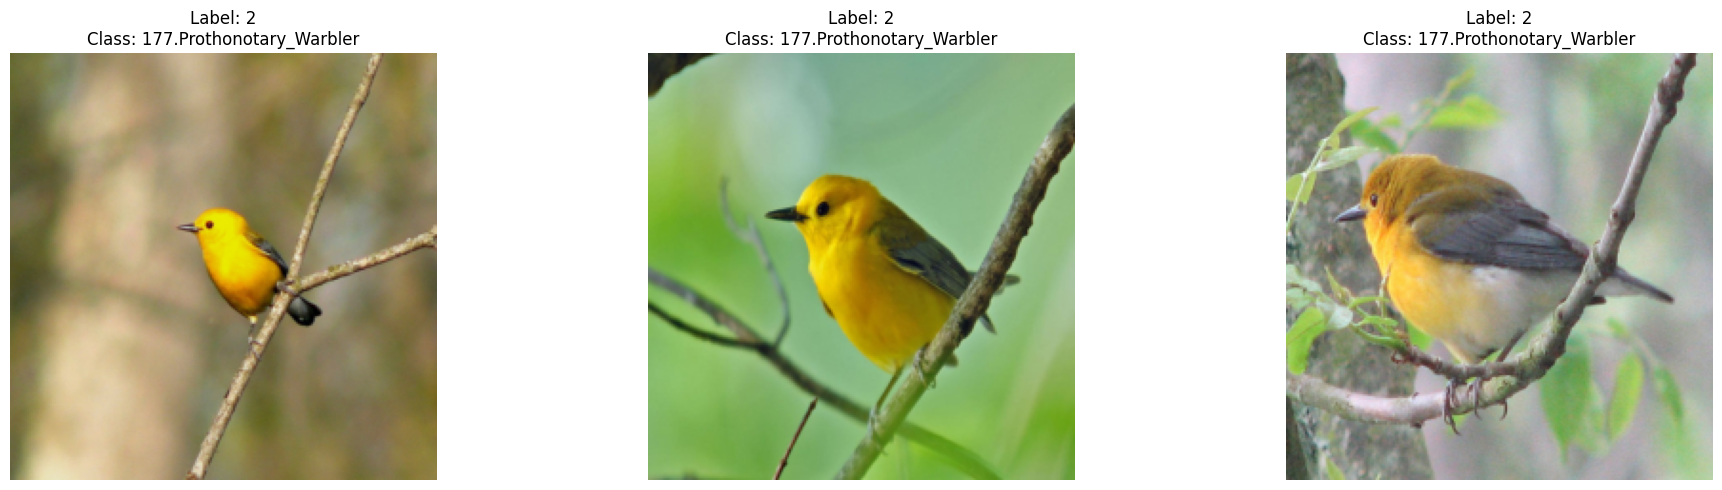

In [ ]:
print('Test Dataset :')
visualize_by_label(val_dataset, label_to_display=2, num_images=3)


# **Nombre d'images pour chaque classe**

In [3]:
for class_name in class_to_idx_mapping:
    class_dir = os.path.join(train_dir, class_name)
    num_images = len(os.listdir(class_dir))
    print(f"Classe : {class_name}, Nombre d'images : {num_images}")

Classe : 185.Bohemian_Waxwing, Nombre d'images : 51
Classe : 186.Cedar_Waxwing, Nombre d'images : 51
Classe : 085.Horned_Lark, Nombre d'images : 51
Classe : 188.Pileated_Woodpecker, Nombre d'images : 51
Classe : 144.Common_Tern, Nombre d'images : 51
Classe : 177.Prothonotary_Warbler, Nombre d'images : 51
Classe : 179.Tennessee_Warbler, Nombre d'images : 50
Classe : 099.Ovenbird, Nombre d'images : 51
Classe : 167.Hooded_Warbler, Nombre d'images : 51
Classe : 143.Caspian_Tern, Nombre d'images : 51
Classe : 029.American_Crow, Nombre d'images : 51
Classe : 073.Blue_Jay, Nombre d'images : 51
Classe : 176.Prairie_Warbler, Nombre d'images : 51
Classe : 183.Northern_Waterthrush, Nombre d'images : 51
Classe : 039.Least_Flycatcher, Nombre d'images : 50
Classe : 199.Winter_Wren, Nombre d'images : 51
Classe : 192.Downy_Woodpecker, Nombre d'images : 51
Classe : 182.Yellow_Warbler, Nombre d'images : 51
Classe : 119.Field_Sparrow, Nombre d'images : 50
Classe : 026.Bronzed_Cowbird, Nombre d'images : 5

# **Type de chaque image**

In [4]:
# Parcourir chaque classe
for class_name in class_to_idx_mapping:
    class_dir = os.path.join(train_dir, class_name)  # Chemin vers la classe
    images = os.listdir(class_dir)  # Liste des images dans la classe

    print(f"\nClasse : {class_name}, Nombre d'images : {len(images)}")

    for image_name in images:
        image_path = os.path.join(class_dir, image_name)  # Chemin vers l'image
        try:
            # Charger l'image
            image = Image.open(image_path)
            # Afficher ses propriétés
            print(f"  Image : {image_name}, Dimensions : {image.size}, Mode : {image.mode}")
        except Exception as e:
            print(f"  Erreur lors du chargement de l'image {image_name} : {e}")


Classe : 185.Bohemian_Waxwing, Nombre d'images : 51
  Image : Bohemian_Waxwing_0084_796639.jpg, Dimensions : (500, 400), Mode : RGB
  Image : Bohemian_Waxwing_0054_796623.jpg, Dimensions : (500, 336), Mode : RGB
  Image : Bohemian_Waxwing_0037_796638.jpg, Dimensions : (500, 348), Mode : RGB
  Image : Bohemian_Waxwing_0031_796633.jpg, Dimensions : (341, 500), Mode : RGB
  Image : Bohemian_Waxwing_0092_796666.jpg, Dimensions : (500, 303), Mode : RGB
  Image : Bohemian_Waxwing_0030_177635.jpg, Dimensions : (500, 335), Mode : RGB
  Image : Bohemian_Waxwing_0041_177630.jpg, Dimensions : (445, 500), Mode : RGB
  Image : Bohemian_Waxwing_0060_796642.jpg, Dimensions : (240, 300), Mode : RGB
  Image : Bohemian_Waxwing_0056_796645.jpg, Dimensions : (450, 334), Mode : RGB
  Image : Bohemian_Waxwing_0100_796627.jpg, Dimensions : (500, 347), Mode : RGB
  Image : Bohemian_Waxwing_0096_177969.jpg, Dimensions : (500, 339), Mode : RGB
  Image : Bohemian_Waxwing_0098_178009.jpg, Dimensions : (496, 500)

In [8]:
import os
import random
import numpy as np
import pandas as pd
from PIL import Image
from tqdm import tqdm
from pathlib import Path

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import CosineAnnealingLR
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models

# =======================
# 1) Fixer la seed pour reproductibilité
# =======================
def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)

set_seed(42)

# =======================
# 2) Configuration des chemins et paramètres
# =======================
class_indexes_path = "/content/dataset/dataset/class_indexes.csv"
train_dir = "/content/dataset/dataset/train_images"
val_dir = "/content/dataset/dataset/val_images"
test_data_path = "/content/dataset/dataset/test_images"
save_path = "optimized_model.pth"


## Application de Plusieurs Redimensionnements et Sélection du Meilleur

Essayez de faire tourner le modèle avec un redimensionnement des images en **128×128**.  
Testez plusieurs tailles de redimensionnement pour évaluer les performances du modèle et identifiez celle offrant les meilleurs résultats.


In [ ]:

batch_size = 32
num_workers = 4
num_epochs_1 = 20  # Phase 1 : Freeze
num_epochs_2 = 15  # Phase 2 : Fine-tuning
lr_phase1 = 1e-4
lr_phase2 = 1e-5
label_smoothing = 0.1

# =======================
# 3) Lecture des classes
# =======================
class_indexes = pd.read_csv(class_indexes_path)
class_to_idx_mapping = {row['category_cub']: row['idx'] for _, row in class_indexes.iterrows()}
num_classes = len(class_to_idx_mapping)

# =======================
# 4) Dataset Personnalisé
# =======================
class CustomBirdsDataset(Dataset):
    def __init__(self, root_dir, class_to_idx, transform=None):
        self.root_dir = root_dir
        self.class_to_idx = class_to_idx
        self.transform = transform
        self.samples = []

        for class_name, class_idx in class_to_idx.items():
            class_dir = os.path.join(root_dir, class_name)
            if not os.path.isdir(class_dir):
                continue
            for img_name in os.listdir(class_dir):
                img_path = os.path.join(class_dir, img_name)
                self.samples.append((img_path, class_idx))

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        img_path, label = self.samples[idx]
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        return image, label

# =======================
# Transformations pour les données d'entraînement avec dimension 128x128
train_transform_128 = transforms.Compose([
    transforms.RandomResizedCrop(128, scale=(0.5, 1.0)),  # Découpage aléatoire avec redimensionnement à 128x128
    transforms.RandomHorizontalFlip(p=0.5),               # Flip horizontal aléatoire
    transforms.RandomRotation(degrees=20),                # Rotation aléatoire de ±20°
    transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0.05),  # Ajustements de couleur
    transforms.ToTensor(),                                # Conversion en tenseur
    transforms.RandomErasing(p=0.5, scale=(0.02, 0.33), ratio=(0.3, 3.3)),  # Suppression aléatoire
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalisation
])

val_test_transform_128 = transforms.Compose([
    transforms.Resize(128),       # Redimensionnement à 128x128
    transforms.CenterCrop(128),   # Découpage central à 128x128
    transforms.ToTensor(),        # Conversion en tenseur
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalisation
])

# =======================
# 6) Construction des DataLoaders
# =======================
train_dataset = CustomBirdsDataset(train_dir, class_to_idx_mapping, transform=train_transform)
val_dataset = CustomBirdsDataset(val_dir, class_to_idx_mapping, transform=val_test_transform)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers)

print(f"Train set: {len(train_dataset)} images")
print(f"Validation set: {len(val_dataset)} images")

# =======================
# 7) Création du Modèle
# =======================
model = models.resnet50(pretrained=True)
num_features = model.fc.in_features

# Remplacer la dernière couche par un classifieur
model.fc = nn.Sequential(
    nn.Linear(num_features, 512),
    nn.ReLU(inplace=True),
    nn.Dropout(p=0.4),
    nn.Linear(512, num_classes)
)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# =======================
# 8) Entraînement et Validation
# =======================
criterion = nn.CrossEntropyLoss(label_smoothing=label_smoothing)

def train_and_validate(model, train_loader, val_loader, optimizer, scheduler, epochs, phase="Freeze"):
    best_acc = 0.0

    for epoch in range(epochs):
        # Entraînement
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs} [{phase}]"):
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

        scheduler.step()

        # Validation
        val_loss, val_acc = validate(model, val_loader)
        print(f"[Epoch {epoch+1}/{epochs} - {phase}] Train Loss: {running_loss / len(train_loader):.4f} | "
              f"Val Loss: {val_loss:.4f} | Val Accuracy: {val_acc:.4f}")

        # Sauvegarde du meilleur modèle
        if val_acc > best_acc:
            best_acc = val_acc
            torch.save(model.state_dict(), save_path)
            print(f"==> Best model saved with accuracy: {best_acc:.4f}")

def validate(model, loader):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    val_loss = running_loss / len(loader)
    val_acc = correct / total
    return val_loss, val_acc

# =======================
# 9) Phase 1 : Freeze
# =======================
for param in model.parameters():
    param.requires_grad = False
for param in model.fc.parameters():
    param.requires_grad = True

optimizer = optim.AdamW(model.fc.parameters(), lr=lr_phase1)
scheduler = CosineAnnealingLR(optimizer, T_max=num_epochs_1)

train_and_validate(model, train_loader, val_loader, optimizer, scheduler, num_epochs_1, phase="Freeze")

# =======================
# 10) Phase 2 : Fine-tuning
# =======================
for param in model.parameters():
    param.requires_grad = True

optimizer = optim.AdamW(model.parameters(), lr=lr_phase2)
scheduler = CosineAnnealingLR(optimizer, T_max=num_epochs_2)

train_and_validate(model, train_loader, val_loader, optimizer, scheduler, num_epochs_2, phase="Fine-Tune")

# =======================
# 11) Génération des Prédictions sur Test Set
# =======================
class TestDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.image_paths = list(Path(root_dir).rglob("*.jpg"))
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        return image, img_path.stem

# Création du dataset de test
test_dataset = TestDataset(test_data_path, transform=val_test_transform)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False, num_workers=num_workers)

# Fonction pour générer un fichier de soumission
def generate_submission(model, test_loader, output_file="submission.csv"):
    model.eval()
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    with open(output_file, "w") as f:
        f.write("id,category\n")
        for images, ids in tqdm(test_loader, desc="Generating Predictions"):
            images = images.to(device)
            with torch.no_grad():
                outputs = model(images)
                _, predicted = torch.max(outputs, 1)
            f.write(f"{ids[0]},{predicted.item()}\n")

# Génération du fichier de soumission
generate_submission(model, test_loader, output_file="submission.csv")


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNe

Train set: 1525 images
Validation set: 270 images


Epoch 1/20 [Freeze]: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]


[Epoch 1/20 - Freeze] Train Loss: 3.3120 | Val Loss: 3.0871 | Val Accuracy: 0.2704
==> Best model saved with accuracy: 0.2704


Epoch 2/20 [Freeze]: 100%|██████████| 48/48 [00:10<00:00,  4.68it/s]


[Epoch 2/20 - Freeze] Train Loss: 2.9925 | Val Loss: 2.7466 | Val Accuracy: 0.3741
==> Best model saved with accuracy: 0.3741


Epoch 3/20 [Freeze]: 100%|██████████| 48/48 [00:09<00:00,  4.90it/s]


[Epoch 3/20 - Freeze] Train Loss: 2.6690 | Val Loss: 2.5549 | Val Accuracy: 0.4185
==> Best model saved with accuracy: 0.4185


Epoch 4/20 [Freeze]: 100%|██████████| 48/48 [00:08<00:00,  5.94it/s]


[Epoch 4/20 - Freeze] Train Loss: 2.3848 | Val Loss: 2.4156 | Val Accuracy: 0.3926


Epoch 5/20 [Freeze]: 100%|██████████| 48/48 [00:10<00:00,  4.78it/s]


[Epoch 5/20 - Freeze] Train Loss: 2.2209 | Val Loss: 2.3827 | Val Accuracy: 0.4111


Epoch 6/20 [Freeze]: 100%|██████████| 48/48 [00:14<00:00,  3.29it/s]


[Epoch 6/20 - Freeze] Train Loss: 2.0577 | Val Loss: 2.3194 | Val Accuracy: 0.4037


Epoch 7/20 [Freeze]: 100%|██████████| 48/48 [00:10<00:00,  4.74it/s]


[Epoch 7/20 - Freeze] Train Loss: 1.9794 | Val Loss: 2.3431 | Val Accuracy: 0.4296
==> Best model saved with accuracy: 0.4296


Epoch 8/20 [Freeze]: 100%|██████████| 48/48 [00:09<00:00,  4.82it/s]


[Epoch 8/20 - Freeze] Train Loss: 1.9107 | Val Loss: 2.3532 | Val Accuracy: 0.4148


Epoch 9/20 [Freeze]: 100%|██████████| 48/48 [00:08<00:00,  5.86it/s]


[Epoch 9/20 - Freeze] Train Loss: 1.8327 | Val Loss: 2.3366 | Val Accuracy: 0.4185


Epoch 10/20 [Freeze]: 100%|██████████| 48/48 [00:08<00:00,  5.74it/s]


[Epoch 10/20 - Freeze] Train Loss: 1.8201 | Val Loss: 2.3204 | Val Accuracy: 0.4481
==> Best model saved with accuracy: 0.4481


Epoch 11/20 [Freeze]: 100%|██████████| 48/48 [00:09<00:00,  4.84it/s]


[Epoch 11/20 - Freeze] Train Loss: 1.7679 | Val Loss: 2.3379 | Val Accuracy: 0.4370


Epoch 12/20 [Freeze]: 100%|██████████| 48/48 [00:09<00:00,  4.86it/s]


[Epoch 12/20 - Freeze] Train Loss: 1.7317 | Val Loss: 2.3555 | Val Accuracy: 0.4370


Epoch 13/20 [Freeze]: 100%|██████████| 48/48 [00:08<00:00,  5.72it/s]


[Epoch 13/20 - Freeze] Train Loss: 1.6972 | Val Loss: 2.3484 | Val Accuracy: 0.4296


Epoch 14/20 [Freeze]: 100%|██████████| 48/48 [00:08<00:00,  5.41it/s]


[Epoch 14/20 - Freeze] Train Loss: 1.7015 | Val Loss: 2.3416 | Val Accuracy: 0.4444


Epoch 15/20 [Freeze]: 100%|██████████| 48/48 [00:10<00:00,  4.70it/s]


[Epoch 15/20 - Freeze] Train Loss: 1.7019 | Val Loss: 2.3424 | Val Accuracy: 0.4481


Epoch 16/20 [Freeze]: 100%|██████████| 48/48 [00:10<00:00,  4.60it/s]


[Epoch 16/20 - Freeze] Train Loss: 1.6878 | Val Loss: 2.3484 | Val Accuracy: 0.4481


Epoch 17/20 [Freeze]: 100%|██████████| 48/48 [00:08<00:00,  5.84it/s]


[Epoch 17/20 - Freeze] Train Loss: 1.6832 | Val Loss: 2.3532 | Val Accuracy: 0.4444


Epoch 18/20 [Freeze]: 100%|██████████| 48/48 [00:09<00:00,  5.04it/s]


[Epoch 18/20 - Freeze] Train Loss: 1.6601 | Val Loss: 2.3650 | Val Accuracy: 0.4333


Epoch 19/20 [Freeze]: 100%|██████████| 48/48 [00:10<00:00,  4.76it/s]


[Epoch 19/20 - Freeze] Train Loss: 1.6625 | Val Loss: 2.3672 | Val Accuracy: 0.4296


Epoch 20/20 [Freeze]: 100%|██████████| 48/48 [00:12<00:00,  3.74it/s]


[Epoch 20/20 - Freeze] Train Loss: 1.6891 | Val Loss: 2.3599 | Val Accuracy: 0.4296


Epoch 1/15 [Fine-Tune]: 100%|██████████| 48/48 [00:11<00:00,  4.03it/s]


[Epoch 1/15 - Fine-Tune] Train Loss: 1.6248 | Val Loss: 2.2330 | Val Accuracy: 0.4926
==> Best model saved with accuracy: 0.4926


Epoch 2/15 [Fine-Tune]: 100%|██████████| 48/48 [00:11<00:00,  4.05it/s]


[Epoch 2/15 - Fine-Tune] Train Loss: 1.4820 | Val Loss: 2.1716 | Val Accuracy: 0.5074
==> Best model saved with accuracy: 0.5074


Epoch 3/15 [Fine-Tune]: 100%|██████████| 48/48 [00:10<00:00,  4.62it/s]


[Epoch 3/15 - Fine-Tune] Train Loss: 1.3993 | Val Loss: 2.1430 | Val Accuracy: 0.5222
==> Best model saved with accuracy: 0.5222


Epoch 4/15 [Fine-Tune]: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]


[Epoch 4/15 - Fine-Tune] Train Loss: 1.3210 | Val Loss: 2.0934 | Val Accuracy: 0.5370
==> Best model saved with accuracy: 0.5370


Epoch 5/15 [Fine-Tune]: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]


[Epoch 5/15 - Fine-Tune] Train Loss: 1.2732 | Val Loss: 2.0952 | Val Accuracy: 0.5370


Epoch 6/15 [Fine-Tune]: 100%|██████████| 48/48 [00:11<00:00,  4.27it/s]


[Epoch 6/15 - Fine-Tune] Train Loss: 1.2404 | Val Loss: 2.0858 | Val Accuracy: 0.5481
==> Best model saved with accuracy: 0.5481


Epoch 7/15 [Fine-Tune]: 100%|██████████| 48/48 [00:11<00:00,  4.27it/s]


[Epoch 7/15 - Fine-Tune] Train Loss: 1.1778 | Val Loss: 2.0772 | Val Accuracy: 0.5667
==> Best model saved with accuracy: 0.5667


Epoch 8/15 [Fine-Tune]: 100%|██████████| 48/48 [00:11<00:00,  4.21it/s]


[Epoch 8/15 - Fine-Tune] Train Loss: 1.1791 | Val Loss: 2.0731 | Val Accuracy: 0.5667


Epoch 9/15 [Fine-Tune]: 100%|██████████| 48/48 [00:11<00:00,  4.09it/s]


[Epoch 9/15 - Fine-Tune] Train Loss: 1.1657 | Val Loss: 2.0401 | Val Accuracy: 0.5778
==> Best model saved with accuracy: 0.5778


Epoch 10/15 [Fine-Tune]: 100%|██████████| 48/48 [00:10<00:00,  4.51it/s]


[Epoch 10/15 - Fine-Tune] Train Loss: 1.1378 | Val Loss: 2.0659 | Val Accuracy: 0.5815
==> Best model saved with accuracy: 0.5815


Epoch 11/15 [Fine-Tune]: 100%|██████████| 48/48 [00:09<00:00,  4.96it/s]


[Epoch 11/15 - Fine-Tune] Train Loss: 1.1312 | Val Loss: 2.0514 | Val Accuracy: 0.5815


Epoch 12/15 [Fine-Tune]: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]


[Epoch 12/15 - Fine-Tune] Train Loss: 1.1032 | Val Loss: 2.0652 | Val Accuracy: 0.5667


Epoch 13/15 [Fine-Tune]: 100%|██████████| 48/48 [00:11<00:00,  4.31it/s]


[Epoch 13/15 - Fine-Tune] Train Loss: 1.1059 | Val Loss: 2.0602 | Val Accuracy: 0.5778


Epoch 14/15 [Fine-Tune]: 100%|██████████| 48/48 [00:11<00:00,  4.24it/s]


[Epoch 14/15 - Fine-Tune] Train Loss: 1.1083 | Val Loss: 2.0455 | Val Accuracy: 0.5815


Epoch 15/15 [Fine-Tune]: 100%|██████████| 48/48 [00:11<00:00,  4.30it/s]


[Epoch 15/15 - Fine-Tune] Train Loss: 1.1004 | Val Loss: 2.0691 | Val Accuracy: 0.5815


Generating Predictions: 100%|██████████| 620/620 [00:10<00:00, 61.26it/s]


### Essayez de faire tourner le modèle avec un redimensionnement des images en **64×64**.

In [ ]:

# Transformations pour les données d'entraînement avec dimension 64x64
train_transform_64 = transforms.Compose([
    transforms.RandomResizedCrop(64, scale=(0.5, 1.0)),  # Découpage aléatoire avec redimensionnement à 64x64
    transforms.RandomHorizontalFlip(p=0.5),               # Flip horizontal aléatoire
    transforms.RandomRotation(degrees=20),                # Rotation aléatoire de ±20°
    transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0.05),  # Ajustements de couleur
    transforms.ToTensor(),                                # Conversion en tenseur
    transforms.RandomErasing(p=0.5, scale=(0.02, 0.33), ratio=(0.3, 3.3)),  # Suppression aléatoire
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalisation
])

val_test_transform_64 = transforms.Compose([
    transforms.Resize(64),       # Redimensionnement à 128x128
    transforms.CenterCrop(64),   # Découpage central à 128x128
    transforms.ToTensor(),        # Conversion en tenseur
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalisation
])


# =======================
# 9) Phase 1 : Freeze
# =======================
for param in model.parameters():
    param.requires_grad = False
for param in model.fc.parameters():
    param.requires_grad = True

optimizer = optim.AdamW(model.fc.parameters(), lr=lr_phase1)
scheduler = CosineAnnealingLR(optimizer, T_max=num_epochs_1)

train_and_validate(model, train_loader, val_loader, optimizer, scheduler, num_epochs_1, phase="Freeze")

# =======================
# 10) Phase 2 : Fine-tuning
# =======================
for param in model.parameters():
    param.requires_grad = True

optimizer = optim.AdamW(model.parameters(), lr=lr_phase2)
scheduler = CosineAnnealingLR(optimizer, T_max=num_epochs_2)

train_and_validate(model, train_loader, val_loader, optimizer, scheduler, num_epochs_2, phase="Fine-Tune")



# Création du dataset de test
test_dataset = TestDataset(test_data_path, transform=val_test_transform)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False, num_workers=num_workers)



# Génération du fichier de soumission
generate_submission(model, test_loader, output_file="submission.csv")


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNe

Train set: 1525 images
Validation set: 270 images


Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 103MB/s]
Epoch 1/20 [Freeze]: 100%|██████████| 48/48 [00:17<00:00,  2.67it/s]


[Epoch 1/20 - Freeze] Train Loss: 3.3729 | Val Loss: 3.2621 | Val Accuracy: 0.1778
==> Best model saved with accuracy: 0.1778


Epoch 2/20 [Freeze]: 100%|██████████| 48/48 [00:17<00:00,  2.75it/s]


[Epoch 2/20 - Freeze] Train Loss: 3.2310 | Val Loss: 3.0833 | Val Accuracy: 0.3556
==> Best model saved with accuracy: 0.3556


Epoch 3/20 [Freeze]: 100%|██████████| 48/48 [00:17<00:00,  2.68it/s]


[Epoch 3/20 - Freeze] Train Loss: 3.0495 | Val Loss: 2.9193 | Val Accuracy: 0.4259
==> Best model saved with accuracy: 0.4259


Epoch 4/20 [Freeze]: 100%|██████████| 48/48 [00:17<00:00,  2.69it/s]


[Epoch 4/20 - Freeze] Train Loss: 2.8936 | Val Loss: 2.7265 | Val Accuracy: 0.5481
==> Best model saved with accuracy: 0.5481


Epoch 5/20 [Freeze]: 100%|██████████| 48/48 [00:18<00:00,  2.66it/s]


[Epoch 5/20 - Freeze] Train Loss: 2.7466 | Val Loss: 2.5517 | Val Accuracy: 0.5444


Epoch 6/20 [Freeze]: 100%|██████████| 48/48 [00:17<00:00,  2.71it/s]


[Epoch 6/20 - Freeze] Train Loss: 2.6006 | Val Loss: 2.4173 | Val Accuracy: 0.5704
==> Best model saved with accuracy: 0.5704


Epoch 7/20 [Freeze]: 100%|██████████| 48/48 [00:17<00:00,  2.69it/s]


[Epoch 7/20 - Freeze] Train Loss: 2.5091 | Val Loss: 2.3239 | Val Accuracy: 0.5889
==> Best model saved with accuracy: 0.5889


Epoch 8/20 [Freeze]: 100%|██████████| 48/48 [00:17<00:00,  2.74it/s]


[Epoch 8/20 - Freeze] Train Loss: 2.4065 | Val Loss: 2.2655 | Val Accuracy: 0.5667


Epoch 9/20 [Freeze]: 100%|██████████| 48/48 [00:17<00:00,  2.69it/s]


[Epoch 9/20 - Freeze] Train Loss: 2.3260 | Val Loss: 2.1714 | Val Accuracy: 0.5963
==> Best model saved with accuracy: 0.5963


Epoch 10/20 [Freeze]: 100%|██████████| 48/48 [00:18<00:00,  2.65it/s]


[Epoch 10/20 - Freeze] Train Loss: 2.2642 | Val Loss: 2.0995 | Val Accuracy: 0.6037
==> Best model saved with accuracy: 0.6037


Epoch 11/20 [Freeze]:  29%|██▉       | 14/48 [00:07<00:11,  2.85it/s]

## Conclusion

Le meilleur redimensionnement identifié est **224×224**.  
Cette taille sera utilisée avec ResNet tout au long de ce notebook pour garantir des performances optimales.


# Ameleoration du code du Baseline

### **2. Techniques Utilisées**
1. **Modèle pré-entraîné** :
   - **ResNet50** avec des poids pré-entraînés sur ImageNet.
   - La couche finale est remplacée par une petite tête de classification adaptée au nombre de classes du dataset.
   
2. **Phases d’entraînement** :
   - **Phase 1 (Freeze)** : les couches convolutionnelles sont figées, et seule la tête de classification est entraînée.
   - **Phase 2 (Fine-tuning)** : toutes les couches du réseau sont dégelées pour affiner les paramètres.

3. **Transformations des données** :
   - **Augmentations** pour enrichir le dataset : recadrage aléatoire, rotation, translation, et masquage aléatoire.
   - **Normalisation** basée sur les statistiques de l’ensemble ImageNet.




## 4. Régularisation
- **Label Smoothing** : Ajouté à `CrossEntropyLoss` pour réduire la surconfiance du modèle.
- **Dropout** : Utilisé dans la tête de classification pour limiter l’overfitting.

## 5. Optimisation et planification
- **Optimiseur** : `AdamW` pour une meilleure régularisation des poids.
- **Scheduler** : `CosineAnnealingLR` pour ajuster dynamiquement le learning rate.

## 6. Gestion des hyperparamètres
- Deux taux d’apprentissage distincts :
  - **1e-4** pour la phase freeze.
  - **1e-5** pour le fine-tuning.


In [ ]:
import os
import random
import numpy as np
import pandas as pd
from PIL import Image
from tqdm import tqdm
from pathlib import Path

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import CosineAnnealingLR
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models

# =======================
# 1) Fixer la seed pour reproductibilité
# =======================
def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)

set_seed(42)

# =======================
# 2) Configuration des chemins et paramètres
# =======================
class_indexes_path = "/content/dataset/dataset/class_indexes.csv"
train_dir = "/content/dataset/dataset/train_images"
val_dir = "/content/dataset/dataset/val_images"
test_data_path = "/content/dataset/dataset/test_images"
save_path = "optimized_model.pth"

batch_size = 32
num_workers = 4
num_epochs_1 = 20  # Phase 1 : Freeze
num_epochs_2 = 15  # Phase 2 : Fine-tuning
lr_phase1 = 1e-4
lr_phase2 = 1e-5
label_smoothing = 0.1

# =======================
# 3) Lecture des classes
# =======================
class_indexes = pd.read_csv(class_indexes_path)
class_to_idx_mapping = {row['category_cub']: row['idx'] for _, row in class_indexes.iterrows()}
num_classes = len(class_to_idx_mapping)

# =======================
# 4) Dataset Personnalisé
# =======================
class CustomBirdsDataset(Dataset):
    def __init__(self, root_dir, class_to_idx, transform=None):
        self.root_dir = root_dir
        self.class_to_idx = class_to_idx
        self.transform = transform
        self.samples = []

        for class_name, class_idx in class_to_idx.items():
            class_dir = os.path.join(root_dir, class_name)
            if not os.path.isdir(class_dir):
                continue
            for img_name in os.listdir(class_dir):
                img_path = os.path.join(class_dir, img_name)
                self.samples.append((img_path, class_idx))

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        img_path, label = self.samples[idx]
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        return image, label

# =======================
# 5) Transformations des Données
# =======================
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(224, scale=(0.5, 1.0)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(degrees=20),
    transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0.05),
    transforms.ToTensor(),
    transforms.RandomErasing(p=0.5, scale=(0.02, 0.33), ratio=(0.3, 3.3)),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

val_test_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# =======================
# 6) Construction des DataLoaders
# =======================
train_dataset = CustomBirdsDataset(train_dir, class_to_idx_mapping, transform=train_transform)
val_dataset = CustomBirdsDataset(val_dir, class_to_idx_mapping, transform=val_test_transform)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers)

print(f"Train set: {len(train_dataset)} images")
print(f"Validation set: {len(val_dataset)} images")

# =======================
# 7) Création du Modèle
# =======================
model = models.resnet50(pretrained=True)
num_features = model.fc.in_features

# Remplacer la dernière couche par un classifieur
model.fc = nn.Sequential(
    nn.Linear(num_features, 512),
    nn.ReLU(inplace=True),
    nn.Dropout(p=0.4),
    nn.Linear(512, num_classes)
)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# =======================
# 8) Entraînement et Validation
# =======================
criterion = nn.CrossEntropyLoss(label_smoothing=label_smoothing)

def train_and_validate(model, train_loader, val_loader, optimizer, scheduler, epochs, phase="Freeze"):
    best_acc = 0.0

    for epoch in range(epochs):
        # Entraînement
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs} [{phase}]"):
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

        scheduler.step()

        # Validation
        val_loss, val_acc = validate(model, val_loader)
        print(f"[Epoch {epoch+1}/{epochs} - {phase}] Train Loss: {running_loss / len(train_loader):.4f} | "
              f"Val Loss: {val_loss:.4f} | Val Accuracy: {val_acc:.4f}")

        # Sauvegarde du meilleur modèle
        if val_acc > best_acc:
            best_acc = val_acc
            torch.save(model.state_dict(), save_path)
            print(f"==> Best model saved with accuracy: {best_acc:.4f}")

def validate(model, loader):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    val_loss = running_loss / len(loader)
    val_acc = correct / total
    return val_loss, val_acc

# =======================
# 9) Phase 1 : Freeze
# =======================
for param in model.parameters():
    param.requires_grad = False
for param in model.fc.parameters():
    param.requires_grad = True

optimizer = optim.AdamW(model.fc.parameters(), lr=lr_phase1)
scheduler = CosineAnnealingLR(optimizer, T_max=num_epochs_1)

train_and_validate(model, train_loader, val_loader, optimizer, scheduler, num_epochs_1, phase="Freeze")

# =======================
# 10) Phase 2 : Fine-tuning
# =======================
for param in model.parameters():
    param.requires_grad = True

optimizer = optim.AdamW(model.parameters(), lr=lr_phase2)
scheduler = CosineAnnealingLR(optimizer, T_max=num_epochs_2)

train_and_validate(model, train_loader, val_loader, optimizer, scheduler, num_epochs_2, phase="Fine-Tune")

# =======================
# 13) Générer les Prédictions pour le Test
# =======================

class TestDataset(Dataset):
    """
    Dataset personnalisé pour les données de test.
    Il applique les transformations nécessaires et retourne les images et leurs noms d'identification.
    """
    def __init__(self, root_dir, transform=None):
        self.image_paths = list(Path(root_dir).rglob("*.jpg"))  # Recherche des images .jpg dans le dossier
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert("RGB")  # Chargement de l'image en mode RGB
        if self.transform:
            image = self.transform(image)  # Application des transformations
        return image, img_path.stem  # Retourne l'image transformée et le nom du fichier (sans extension)

# Création du dataset de test avec transformations
test_dataset = TestDataset(test_data_path, transform=val_test_transform)

# Création du DataLoader de test
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False, num_workers=num_workers)

# Fonction pour générer un fichier de soumission
def generate_submission(model, test_loader, output_file="submission.csv"):
    """
    Génère un fichier de soumission au format CSV à partir des prédictions du modèle.

    Args:
        model: Modèle entraîné.
        test_loader: DataLoader pour le dataset de test.
        output_file: Nom du fichier CSV de sortie.
    """
    model.eval()  # Mise en mode évaluation
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    with open(output_file, "w") as f:
        f.write("id,category\n")  # En-têtes du fichier CSV
        for images, ids in tqdm(test_loader, desc="Generating Predictions"):
            images = images.to(device)  # Déplacement des images sur GPU/CPU
            with torch.no_grad():  # Pas de calcul de gradient pendant l'inférence
                outputs = model(images)
                _, predicted = torch.max(outputs, 1)  # Récupère la classe prédite
            f.write(f"{ids[0]},{predicted.item()}\n")  # Écrit le résultat dans le fichier

# Générer les prédictions et sauvegarder dans un fichier CSV
generate_submission(model, test_loader, output_file="submission.csv")


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNe

Train set: 1525 images
Validation set: 270 images


Epoch 1/20 [Freeze]: 100%|██████████| 48/48 [00:16<00:00,  3.00it/s]


[Epoch 1/20 - Freeze] Train Loss: 3.3729 | Val Loss: 3.2621 | Val Accuracy: 0.1778
==> Best model saved with accuracy: 0.1778


Epoch 2/20 [Freeze]: 100%|██████████| 48/48 [00:16<00:00,  3.00it/s]


[Epoch 2/20 - Freeze] Train Loss: 3.2310 | Val Loss: 3.0833 | Val Accuracy: 0.3556
==> Best model saved with accuracy: 0.3556


Epoch 3/20 [Freeze]: 100%|██████████| 48/48 [00:16<00:00,  2.94it/s]


[Epoch 3/20 - Freeze] Train Loss: 3.0495 | Val Loss: 2.9193 | Val Accuracy: 0.4259
==> Best model saved with accuracy: 0.4259


Epoch 4/20 [Freeze]: 100%|██████████| 48/48 [00:15<00:00,  3.01it/s]


[Epoch 4/20 - Freeze] Train Loss: 2.8936 | Val Loss: 2.7265 | Val Accuracy: 0.5481
==> Best model saved with accuracy: 0.5481


Epoch 5/20 [Freeze]: 100%|██████████| 48/48 [00:15<00:00,  3.01it/s]


[Epoch 5/20 - Freeze] Train Loss: 2.7466 | Val Loss: 2.5517 | Val Accuracy: 0.5444


Epoch 6/20 [Freeze]: 100%|██████████| 48/48 [00:15<00:00,  3.03it/s]


[Epoch 6/20 - Freeze] Train Loss: 2.6006 | Val Loss: 2.4173 | Val Accuracy: 0.5704
==> Best model saved with accuracy: 0.5704


Epoch 7/20 [Freeze]: 100%|██████████| 48/48 [00:16<00:00,  2.98it/s]


[Epoch 7/20 - Freeze] Train Loss: 2.5091 | Val Loss: 2.3239 | Val Accuracy: 0.5889
==> Best model saved with accuracy: 0.5889


Epoch 8/20 [Freeze]: 100%|██████████| 48/48 [00:15<00:00,  3.00it/s]


[Epoch 8/20 - Freeze] Train Loss: 2.4065 | Val Loss: 2.2655 | Val Accuracy: 0.5667


Epoch 9/20 [Freeze]: 100%|██████████| 48/48 [00:15<00:00,  3.02it/s]


[Epoch 9/20 - Freeze] Train Loss: 2.3260 | Val Loss: 2.1714 | Val Accuracy: 0.5963
==> Best model saved with accuracy: 0.5963


Epoch 10/20 [Freeze]: 100%|██████████| 48/48 [00:16<00:00,  2.86it/s]


[Epoch 10/20 - Freeze] Train Loss: 2.2642 | Val Loss: 2.0995 | Val Accuracy: 0.6037
==> Best model saved with accuracy: 0.6037


Epoch 11/20 [Freeze]: 100%|██████████| 48/48 [00:15<00:00,  3.03it/s]


[Epoch 11/20 - Freeze] Train Loss: 2.2256 | Val Loss: 2.0562 | Val Accuracy: 0.6593
==> Best model saved with accuracy: 0.6593


Epoch 12/20 [Freeze]: 100%|██████████| 48/48 [00:15<00:00,  3.01it/s]


[Epoch 12/20 - Freeze] Train Loss: 2.1800 | Val Loss: 2.0268 | Val Accuracy: 0.6481


Epoch 13/20 [Freeze]: 100%|██████████| 48/48 [00:15<00:00,  3.02it/s]


[Epoch 13/20 - Freeze] Train Loss: 2.1464 | Val Loss: 1.9963 | Val Accuracy: 0.6481


Epoch 14/20 [Freeze]: 100%|██████████| 48/48 [00:16<00:00,  2.99it/s]


[Epoch 14/20 - Freeze] Train Loss: 2.1297 | Val Loss: 1.9915 | Val Accuracy: 0.6444


Epoch 15/20 [Freeze]: 100%|██████████| 48/48 [00:15<00:00,  3.04it/s]


[Epoch 15/20 - Freeze] Train Loss: 2.1336 | Val Loss: 1.9717 | Val Accuracy: 0.6556


Epoch 16/20 [Freeze]: 100%|██████████| 48/48 [00:15<00:00,  3.01it/s]


[Epoch 16/20 - Freeze] Train Loss: 2.0914 | Val Loss: 1.9584 | Val Accuracy: 0.6444


Epoch 17/20 [Freeze]: 100%|██████████| 48/48 [00:16<00:00,  2.89it/s]


[Epoch 17/20 - Freeze] Train Loss: 2.0889 | Val Loss: 1.9701 | Val Accuracy: 0.6519


Epoch 18/20 [Freeze]: 100%|██████████| 48/48 [00:15<00:00,  3.06it/s]


[Epoch 18/20 - Freeze] Train Loss: 2.0579 | Val Loss: 1.9547 | Val Accuracy: 0.6407


Epoch 19/20 [Freeze]: 100%|██████████| 48/48 [00:16<00:00,  2.97it/s]


[Epoch 19/20 - Freeze] Train Loss: 2.0518 | Val Loss: 1.9483 | Val Accuracy: 0.6556


Epoch 20/20 [Freeze]: 100%|██████████| 48/48 [00:15<00:00,  3.04it/s]


[Epoch 20/20 - Freeze] Train Loss: 2.0569 | Val Loss: 1.9472 | Val Accuracy: 0.6519


Epoch 1/15 [Fine-Tune]: 100%|██████████| 48/48 [00:20<00:00,  2.38it/s]


[Epoch 1/15 - Fine-Tune] Train Loss: 1.9276 | Val Loss: 1.6593 | Val Accuracy: 0.6963
==> Best model saved with accuracy: 0.6963


Epoch 2/15 [Fine-Tune]: 100%|██████████| 48/48 [00:19<00:00,  2.51it/s]


[Epoch 2/15 - Fine-Tune] Train Loss: 1.7507 | Val Loss: 1.5336 | Val Accuracy: 0.7296
==> Best model saved with accuracy: 0.7296


Epoch 3/15 [Fine-Tune]: 100%|██████████| 48/48 [00:19<00:00,  2.46it/s]


[Epoch 3/15 - Fine-Tune] Train Loss: 1.6592 | Val Loss: 1.4578 | Val Accuracy: 0.7593
==> Best model saved with accuracy: 0.7593


Epoch 4/15 [Fine-Tune]: 100%|██████████| 48/48 [00:18<00:00,  2.54it/s]


[Epoch 4/15 - Fine-Tune] Train Loss: 1.5715 | Val Loss: 1.4083 | Val Accuracy: 0.7889
==> Best model saved with accuracy: 0.7889


Epoch 5/15 [Fine-Tune]: 100%|██████████| 48/48 [00:20<00:00,  2.36it/s]


[Epoch 5/15 - Fine-Tune] Train Loss: 1.4974 | Val Loss: 1.3562 | Val Accuracy: 0.8000
==> Best model saved with accuracy: 0.8000


Epoch 6/15 [Fine-Tune]: 100%|██████████| 48/48 [00:19<00:00,  2.51it/s]


[Epoch 6/15 - Fine-Tune] Train Loss: 1.4824 | Val Loss: 1.3086 | Val Accuracy: 0.8148
==> Best model saved with accuracy: 0.8148


Epoch 7/15 [Fine-Tune]: 100%|██████████| 48/48 [00:20<00:00,  2.39it/s]


[Epoch 7/15 - Fine-Tune] Train Loss: 1.4152 | Val Loss: 1.2947 | Val Accuracy: 0.8037


Epoch 8/15 [Fine-Tune]: 100%|██████████| 48/48 [00:19<00:00,  2.51it/s]


[Epoch 8/15 - Fine-Tune] Train Loss: 1.3952 | Val Loss: 1.2721 | Val Accuracy: 0.8185
==> Best model saved with accuracy: 0.8185


Epoch 9/15 [Fine-Tune]: 100%|██████████| 48/48 [00:19<00:00,  2.44it/s]


[Epoch 9/15 - Fine-Tune] Train Loss: 1.3998 | Val Loss: 1.2427 | Val Accuracy: 0.8296
==> Best model saved with accuracy: 0.8296


Epoch 10/15 [Fine-Tune]: 100%|██████████| 48/48 [00:19<00:00,  2.50it/s]


[Epoch 10/15 - Fine-Tune] Train Loss: 1.3519 | Val Loss: 1.2510 | Val Accuracy: 0.8296


Epoch 11/15 [Fine-Tune]: 100%|██████████| 48/48 [00:19<00:00,  2.42it/s]


[Epoch 11/15 - Fine-Tune] Train Loss: 1.3385 | Val Loss: 1.2364 | Val Accuracy: 0.8407
==> Best model saved with accuracy: 0.8407


Epoch 12/15 [Fine-Tune]: 100%|██████████| 48/48 [00:19<00:00,  2.51it/s]


[Epoch 12/15 - Fine-Tune] Train Loss: 1.3383 | Val Loss: 1.2263 | Val Accuracy: 0.8296


Epoch 13/15 [Fine-Tune]: 100%|██████████| 48/48 [00:20<00:00,  2.38it/s]


[Epoch 13/15 - Fine-Tune] Train Loss: 1.3297 | Val Loss: 1.2337 | Val Accuracy: 0.8296


Epoch 14/15 [Fine-Tune]: 100%|██████████| 48/48 [00:19<00:00,  2.51it/s]


[Epoch 14/15 - Fine-Tune] Train Loss: 1.3432 | Val Loss: 1.2239 | Val Accuracy: 0.8407


Epoch 15/15 [Fine-Tune]: 100%|██████████| 48/48 [00:20<00:00,  2.37it/s]


[Epoch 15/15 - Fine-Tune] Train Loss: 1.3303 | Val Loss: 1.2284 | Val Accuracy: 0.8333


Generating Predictions: 100%|██████████| 620/620 [00:11<00:00, 55.76it/s]


### Bien que le modèle de base ResNet, utilisant une architecture classique de réseau de neurones convolutifs `CNN`, ait donné des résultats moyens, nous allons l'utiliser comme backbone en combinaison avec les transformers `ViT (Vision Transformers)`.



## `Utilisation d'un modèle hybride`

#### Implémentation d'un modèle hybride combinant l'extraction des caractéristiques du ResNet, réputé pour sa capacité à capturer des informations locales grâce à son architecture CNN classique, et l'utilisation de ViT (Vision Transformer) pour exploiter les relations globales au sein des données.

# Modele hybride (ResNet + Transformer)


## 1ère approche : Utilisation de GAP (Global Average Pooling) dans ResNet

Dans le modèle ResNet50, les dimensions typiques des cartes de caractéristiques avant l'application du **Global Average Pooling (GAP)** sont les suivantes :

- **Entrée avant GAP :** `[batch_size, 2048, 7, 7]`  
  - **2048 :** Nombre de canaux (provenant du dernier bloc convolutif).
  - **7x7 :** Dimensions spatiales de chaque canal.

Le processus de calcul du GAP dans ResNet fonctionne comme suit :

1. Pour chaque canal (2048 canaux au total), GAP calcule la moyenne de tous les pixels dans les dimensions spatiales (7x7).
2. Cette opération transforme chaque canal de taille `[7, 7]` en un seul scalaire, représentant la moyenne de tous les pixels dans ce canal.

- **Sortie après GAP :** `[batch_size, 2048]`  
  Un vecteur de 2048 valeurs scalaires est généré pour chaque image dans le batch, chacune représentant la moyenne de ses pixels pour un canal spécifique.

## Longueur 1  
Dans ce modèle, la sortie de ResNet `[batch_size, 2048]` est déjà un vecteur global qui représente l'ensemble de l'image. Plutôt que de diviser l'image en plusieurs patchs, ce vecteur global est traité comme une séquence de longueur 1.


    - On utilise ResNet50 (pré-entraîné) comme backbone pour extraire des features.
    - On retire la couche FC de ResNet, on récupère le "spatial feature map" après la dernière couche,
      ou on récupère la sortie du pool (selon le design).
    - On convertit ces features en séquence pour le TransformerEncoder.
    - On applique un TransformerEncoder sur cette séquence.
    - On agrège (ex: CLS token) ou on pool la séquence avant la classification finale.
    

In [ ]:
import os
import random
import numpy as np
import pandas as pd
from pathlib import Path
from PIL import Image
from tqdm import tqdm

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import CosineAnnealingLR
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models


# ======================================================================
# 1) Fixer la seed pour la reproductibilité
# ======================================================================
def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)

set_seed(42)

# ======================================================================
# 2) Configurations chemins / paramètres
# ======================================================================
class_indexes_path = "/content/dataset/dataset/class_indexes.csv"
train_dir         = "/content/dataset/dataset/train_images"
val_dir           = "/content/dataset/dataset/val_images"
test_data_path    = "/content/dataset/dataset/test_images"
save_path         = "best_hybrid_model.pth"

batch_size    = 32
num_workers   = 4
num_epochs    = 20
initial_lr    = 1e-4
label_smoothing = 0.1

# Spécifications du Transformer
d_model     = 512   # dimension interne pour le Transformer
n_heads     = 1     # nombre de têtes dans le multi-head attention
n_layers    = 2     # nombre de couches de l'Encoder Transformer
ffn_dim     = 1024  # dimension du feed-forward interne au Transformer
dropout_att = 0.1   # dropout dans le Transformer

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ======================================================================
# 3) Lecture du CSV pour récupérer la liste des classes
# ======================================================================
class_indexes = pd.read_csv(class_indexes_path)
class_to_idx_mapping = {row['category_cub']: row['idx'] for _, row in class_indexes.iterrows()}
num_classes = len(class_to_idx_mapping)


# ======================================================================
# 4) Dataset personnalisé
# ======================================================================
class CustomBirdsDataset(Dataset):
    def __init__(self, root_dir, class_to_idx, transform=None):
        self.root_dir     = root_dir
        self.class_to_idx = class_to_idx
        self.transform    = transform
        self.samples      = []

        for class_name, class_idx in class_to_idx.items():
            class_dir = os.path.join(root_dir, class_name)
            if not os.path.isdir(class_dir):
                continue
            for img_name in os.listdir(class_dir):
                img_path = os.path.join(class_dir, img_name)
                self.samples.append((img_path, class_idx))

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        img_path, label = self.samples[idx]
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        return image, label

# ======================================================================
# 5) Transformations de données
# ======================================================================
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(degrees=15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

val_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# ======================================================================
# 6) Dataloaders
# ======================================================================
train_dataset = CustomBirdsDataset(train_dir, class_to_idx_mapping, transform=train_transform)
val_dataset   = CustomBirdsDataset(val_dir,   class_to_idx_mapping, transform=val_transform)

train_loader  = DataLoader(train_dataset, batch_size=batch_size, shuffle=True,  num_workers=num_workers)
val_loader    = DataLoader(val_dataset,   batch_size=batch_size, shuffle=False, num_workers=num_workers)

print(f"Train dataset size: {len(train_dataset)}")
print(f"Val   dataset size: {len(val_dataset)}")

# ======================================================================
# 7) Définition du modèle Hybride (ResNet + Transformer)
# ======================================================================
class HybridResNetTransformer(nn.Module):

    def __init__(self, num_classes, d_model=512, n_heads=8, num_layers=2, ffn_dim=1024, dropout=0.1):
        super().__init__()

        # --- 1) Backbone ResNet ---
        self.backbone = models.resnet50(pretrained=True)
        # Supprimer la FC, conserver tout le CNN jusqu'à layer4 + avgpool
        # On va remplacer la fc par nn.Identity()
        self.backbone.fc = nn.Identity()

        # On peut aussi "freeze" partiellement le backbone si on veut
        # (à vous de choisir ou de le faire en 2 phases d'entraînement).
        # for param in self.backbone.parameters():
        #    param.requires_grad = False

        # --- 2) Projection dimensionnelle ---
        # La sortie d'un ResNet50, après avgpool, fait [batch, 2048].
        # On veut projeter 2048 -> d_model pour le Transformer
        self.feature_dim = 2048
        self.d_model = d_model

        self.proj = nn.Linear(self.feature_dim, d_model)

        # --- 3) Transformer Encoder ---
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=d_model,
            nhead=n_heads,
            dim_feedforward=ffn_dim,
            dropout=dropout,
            activation="relu",
            batch_first=True  # pour avoir (batch, seq, feature)
        )
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)



        # --- 4) Classification finale ---
        self.classifier = nn.Linear(d_model, num_classes)

    def forward(self, x):
        # 1) Extraire features via ResNet (sortie = [batch, 2048])
        feats = self.backbone(x)  # [batch, 2048]

        # 2) Projection en d_model
        feats = self.proj(feats)  # [batch, d_model]

        # 3) On va simuler une séquence de longueur 1 : shape = [batch, 1, d_model]
        feats_seq = feats.unsqueeze(1)

        # 4) Transformer Encoder
        # (ça n'a pas trop de sens si seq_len=1, sauf si vous modifiez la façon de sortir la feature map)
        feats_encoded = self.transformer_encoder(feats_seq)  # [batch, 1, d_model]

        # 5) On récupère le token de sortie
        out_token = feats_encoded[:, 0, :]  # shape [batch, d_model]

        # 6) Classification
        logits = self.classifier(out_token) # [batch, num_classes]
        return logits

# ======================================================================
# 8) Instanciation du modèle
# ======================================================================
model = HybridResNetTransformer(
    num_classes=num_classes,
    d_model=d_model,
    n_heads=n_heads,
    num_layers=n_layers,
    ffn_dim=ffn_dim,
    dropout=dropout_att
).to(device)

# ======================================================================
# 9) Configuration de la loss, de l’optimiseur, du scheduler
# ======================================================================
criterion = nn.CrossEntropyLoss(label_smoothing=label_smoothing)
optimizer = optim.AdamW(model.parameters(), lr=initial_lr)
scheduler = CosineAnnealingLR(optimizer, T_max=num_epochs, eta_min=1e-6)

# ======================================================================
# 10) Fonctions d'entraînement / validation
# ======================================================================
def train_one_epoch(model, loader, optimizer, criterion):
    model.train()
    running_loss = 0.0
    correct = 0
    total   = 0

    for images, labels in tqdm(loader, leave=False):
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    epoch_loss = running_loss / len(loader.dataset)
    epoch_acc  = correct / total
    return epoch_loss, epoch_acc

def validate(model, loader, criterion):
    model.eval()
    running_loss = 0.0
    correct = 0
    total   = 0
    with torch.no_grad():
        for images, labels in loader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item() * images.size(0)

            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    epoch_loss = running_loss / len(loader.dataset)
    epoch_acc  = correct / total
    return epoch_loss, epoch_acc

# ======================================================================
# 11) Boucle principale d'entraînement
# ======================================================================
best_val_acc = 0.0

for epoch in range(num_epochs):
    train_loss, train_acc = train_one_epoch(model, train_loader, optimizer, criterion)
    val_loss, val_acc     = validate(model, val_loader, criterion)

    scheduler.step()

    print(f"Epoch [{epoch+1}/{num_epochs}] "
          f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f} | "
          f"Val Loss: {val_loss:.4f},   Val Acc: {val_acc:.4f}")

    # Sauvegarde du meilleur modèle
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(model.state_dict(), save_path)
        print(f"==> Saved best model (Val Acc: {best_val_acc:.4f})")

print(f"Best validation accuracy: {best_val_acc:.4f}")

# ======================================================================
# 12) Chargement du meilleur modèle
# ======================================================================
model.load_state_dict(torch.load(save_path))
model.eval()
print("Best model loaded for inference.")

# ======================================================================
# 13) Génération de prédictions sur un set de test
# ======================================================================
class TestDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.image_paths = list(Path(root_dir).rglob("*.jpg"))
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        return image, img_path.stem

test_dataset = TestDataset(test_data_path, transform=val_transform)
test_loader  = DataLoader(test_dataset, batch_size=1, shuffle=False, num_workers=num_workers)

def generate_submission(model, test_loader, output_file="submission.csv"):
    model.eval()
    with open(output_file, "w") as f:
        f.write("id,category\n")
        for images, ids in tqdm(test_loader, desc="Generating submission"):
            images = images.to(device)
            with torch.no_grad():
                outputs = model(images)
                _, predicted = torch.max(outputs, 1)
            f.write(f"{ids[0]},{predicted.item()}\n")

generate_submission(model, test_loader, "hybsubmission.csv")
# print("Submission generated: submission.csv")


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNe

Train dataset size: 1525
Val   dataset size: 270


Epoch [1/20] Train Loss: 2.0120, Train Acc: 0.5607 | Val Loss: 1.2176,   Val Acc: 0.8111
==> Saved best model (Val Acc: 0.8111)


Epoch [2/20] Train Loss: 1.0134, Train Acc: 0.8748 | Val Loss: 1.1121,   Val Acc: 0.8593
==> Saved best model (Val Acc: 0.8593)


Epoch [3/20] Train Loss: 0.8723, Train Acc: 0.9311 | Val Loss: 1.0846,   Val Acc: 0.8704
==> Saved best model (Val Acc: 0.8704)


Epoch [4/20] Train Loss: 0.7936, Train Acc: 0.9659 | Val Loss: 1.0519,   Val Acc: 0.8667


Epoch [5/20] Train Loss: 0.7345, Train Acc: 0.9856 | Val Loss: 1.1034,   Val Acc: 0.8481


Epoch [6/20] Train Loss: 0.7369, Train Acc: 0.9797 | Val Loss: 0.9975,   Val Acc: 0.8963
==> Saved best model (Val Acc: 0.8963)


Epoch [7/20] Train Loss: 0.7098, Train Acc: 0.9934 | Val Loss: 0.9734,   Val Acc: 0.9111
==> Saved best model (Val Acc: 0.9111)


Epoch [8/20] Train Loss: 0.6928, Train Acc: 0.9961 | Val Loss: 1.0231,   Val Acc: 0.8926


Epoch [9/20] Train Loss: 0.6917, Train Acc: 0.9908 | Val Loss: 0.9672,   Val Acc: 0.9037


Epoch [10/20] Train Loss: 0.6746, Train Acc: 0.9980 | Val Loss: 0.9435,   Val Acc: 0.9148
==> Saved best model (Val Acc: 0.9148)


Epoch [11/20] Train Loss: 0.6761, Train Acc: 0.9954 | Val Loss: 0.9628,   Val Acc: 0.9148


Epoch [12/20] Train Loss: 0.6691, Train Acc: 0.9967 | Val Loss: 0.9675,   Val Acc: 0.9074


Epoch [13/20] Train Loss: 0.6634, Train Acc: 0.9993 | Val Loss: 0.9483,   Val Acc: 0.9148


Epoch [14/20] Train Loss: 0.6614, Train Acc: 0.9993 | Val Loss: 0.9380,   Val Acc: 0.9222
==> Saved best model (Val Acc: 0.9222)


Epoch [15/20] Train Loss: 0.6601, Train Acc: 0.9993 | Val Loss: 0.9334,   Val Acc: 0.9222


Epoch [16/20] Train Loss: 0.6592, Train Acc: 0.9980 | Val Loss: 0.9368,   Val Acc: 0.9222


Epoch [17/20] Train Loss: 0.6609, Train Acc: 0.9980 | Val Loss: 0.9418,   Val Acc: 0.9185


Epoch [18/20] Train Loss: 0.6583, Train Acc: 0.9993 | Val Loss: 0.9373,   Val Acc: 0.9148


Epoch [19/20] Train Loss: 0.6575, Train Acc: 1.0000 | Val Loss: 0.9362,   Val Acc: 0.9185


<ipython-input-8-910f3ae2fa69>:301: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(save_path))


Epoch [20/20] Train Loss: 0.6570, Train Acc: 1.0000 | Val Loss: 0.9302,   Val Acc: 0.9185
Best validation accuracy: 0.9222
Best model loaded for inference.


Generating submission: 100%|██████████| 620/620 [00:10<00:00, 56.99it/s]


## 2ème approche : Utilisation du mécanisme d'attention des Transformers

Dans cette approche, nous remplaçons le mécanisme de **Global Average Pooling (GAP)** par l'utilisation des **Transformers** pour tirer parti de leurs mécanismes d'attention, capables de capturer les relations spatiales dans l'image.

### Fonction de GAP
Le GAP réduit la carte spatiale de dimension **7x7** en une seule valeur par canal, produisant ainsi un vecteur de dimension **[2048, 1]**. Cette opération résume l'information spatiale de chaque canal en une seule valeur scalaire, perdant ainsi toute structure spatiale.

### Pourquoi supprimer GAP ici ?
La suppression du GAP est motivée par le fait que cette opération perd toute information spatiale. Une fois réduite à une seule valeur par canal (par exemple **1x1x2048**), il devient impossible de modéliser les relations spatiales entre différentes régions de l'image. Or, dans les architectures Transformers, ces relations sont essentielles et doivent être capturées dans une séquence de **patches** (ou **tokens**) représentant différentes parties de l'image.

### Suppression de la couche **Fully Connected (FC)**
De plus, dans cette approche, nous remplaçons également la couche **Fully Connected (FC)** qui suit généralement le GAP. Cette couche est souvent utilisée pour la classification, mais dans le cas des Transformers, on préfère utiliser directement une représentation des patches de l'image, sans réduction à une seule valeur globale.


#### Exemple de code pour modifier ResNet afin de capturer les relations détaillées entre différentes régions de l'image :

Supposons que nous extrayons la carte de caractéristiques finale de ResNet, de dimension **[batch_size, 2048, 7, 7]**. Nous pouvons ensuite la transformer en une séquence de **49 "patchs"** (7x7). Cette transformation permet au modèle Transformer d'encoder les relations spatiales entre ces patchs.


In [ ]:
import torch
import torch.nn as nn
from torchvision import models, transforms
from PIL import Image

# Charger un modèle ResNet pré-entraîné
class ModifiedResNet(nn.Module):
    def __init__(self):
        super(ModifiedResNet, self).__init__()
        resnet = models.resnet50(pretrained=True)
        # On conserve toutes les couches sauf `avgpool` et `fc`
        self.features = nn.Sequential(
            *(list(resnet.children())[:-2])  # Conserver les couches jusqu'à `layer4`
        )

    def forward(self, x):
        # Sortie des caractéristiques jusqu'à `layer4`
        x = self.features(x)
        return x

# Instancier le modèle modifié
resnet = ModifiedResNet()

# Charger une image d'exemple
image_path = "/content/dataset/dataset/train_images/019.Gray_Catbird/Gray_Catbird_0001_20695.jpg"  # Remplacez par une image réelle
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Charger et transformer l'image
image = Image.open(image_path).convert("RGB")
input_tensor = transform(image).unsqueeze(0)  # Ajouter une dimension batch

# Passer l'image dans le modèle modifié
resnet.eval()  # Mode évaluation
with torch.no_grad():
    output = resnet(input_tensor)

# Afficher la forme de la sortie
print("Output shape from Modified ResNet:", output.shape)


Output shape from Modified ResNet: torch.Size([1, 2048, 7, 7])


### Explication des techniques utilisee dans le modele hybride resnet + VIT attention  :     
## Structure de ResNet50

ResNet50 est organisé en plusieurs blocs de couches convolutives, appelés *layers* (couches majeures), et non en 50 couches distinctes. La structure globale est la suivante :

```plaintext
Conv1 -> MaxPool -> Layer1 -> Layer2 -> Layer3 -> Layer4 -> GAP -> FC



### **Entrée dans le Transformer**

#### **Extraction des caractéristiques avec ResNet50**
- La sortie du ResNet dans ce modèle est une carte de caractéristiques spatiales avec les dimensions :

- **2048** : Nombre de canaux (sortie de la dernière couche convolutive de ResNet50).
- **7x7** : Dimensions spatiales de la carte de caractéristiques.

- **Étapes principales** :
- **Extraction des caractéristiques** :
  - Le ResNet50 pré-entraîné est utilisé jusqu’à la couche `layer4`.
  - La sortie conserve les dimensions [batch_size, 2048, 7, 7].
- **Projection des caractéristiques** :
  - Une couche linéaire réduit la dimension des canaux de **2048** à `d_model` (512), rendant les données compatibles avec l’entrée du Transformer.

#### **Transformer Encoder**
- Une architecture de **Transformer Encoder** est utilisée pour traiter les caractéristiques extraites.
- **Détails techniques** :
- **2 couches d’encodage** pour modéliser les relations spatiales complexes entre les caractéristiques.
- **8 têtes d’attention** pour capturer les dépendances multi-échelles dans les cartes de caractéristiques.
- **Dimension de feedforward (ffn_dim)** : 1024, pour enrichir les représentations intermédiaires.
- **Dropout** : 10 % pour régulariser et éviter le surapprentissage.

#### **Classification Finale**
- Les caractéristiques encodées par le Transformer sont agrégées en utilisant un **pooling global (mean pooling)** sur les dimensions spatiales



In [ ]:
import os
import random
import numpy as np
import pandas as pd
from pathlib import Path
from PIL import Image
from tqdm import tqdm

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import CosineAnnealingLR
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models

# ----------------------------------------------------
# 1) Fixer la seed pour la reproductibilité
# ----------------------------------------------------
def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)

set_seed(42)

# ----------------------------------------------------
# 2) Configurations chemins / paramètres
# ----------------------------------------------------
class_indexes_path = "/content/dataset/dataset/class_indexes.csv"
train_dir = "/content/dataset/dataset/train_images"
val_dir = "/content/dataset/dataset/val_images"
test_data_path = "/content/dataset/dataset/test_images"
save_path = "best_hybrid_model.pth"

batch_size = 8
num_workers = 4
num_epochs = 20
initial_lr = 1e-4
label_smoothing = 0.1

# Transformer configurations
d_model = 512
n_heads = 8
n_layers = 2
ffn_dim = 1024
dropout_att = 0.1

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ----------------------------------------------------
# 3) Lecture du CSV pour récupérer la liste des classes
# ----------------------------------------------------
class_indexes = pd.read_csv(class_indexes_path)
class_to_idx_mapping = {row['category_cub']: row['idx'] for _, row in class_indexes.iterrows()}
num_classes = len(class_to_idx_mapping)

# ----------------------------------------------------
# 4) Dataset personnalisé
# ----------------------------------------------------
class CustomBirdsDataset(Dataset):
    def __init__(self, root_dir, class_to_idx, transform=None):
        self.root_dir = root_dir
        self.class_to_idx = class_to_idx
        self.transform = transform
        self.samples = []

        for class_name, class_idx in class_to_idx.items():
            class_dir = os.path.join(root_dir, class_name)
            if not os.path.isdir(class_dir):
                continue
            for img_name in os.listdir(class_dir):
                img_path = os.path.join(class_dir, img_name)
                self.samples.append((img_path, class_idx))

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        img_path, label = self.samples[idx]
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        return image, label

# ----------------------------------------------------
# 5) Transformations de données
# ----------------------------------------------------
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(degrees=15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

val_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# ----------------------------------------------------
# 6) Dataloaders
# ----------------------------------------------------
train_dataset = CustomBirdsDataset(train_dir, class_to_idx_mapping, transform=train_transform)
val_dataset = CustomBirdsDataset(val_dir, class_to_idx_mapping, transform=val_transform)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers)

# ----------------------------------------------------
# 7) Définition du modèle Hybride (ResNet + Transformer)
# ----------------------------------------------------
class HybridResNetTransformer(nn.Module):
    def __init__(self, num_classes, d_model=512, n_heads=8, num_layers=2, ffn_dim=1024, dropout=0.1):
        super(HybridResNetTransformer, self).__init__()

        # 1) ResNet modifié pour conserver [batch, 2048, 7, 7]
        resnet = models.resnet50(pretrained=True)
        self.backbone = nn.Sequential(
            *(list(resnet.children())[:-2])  # Conserver jusqu'à layer4
        )

        # 2) Projection de 2048 (features ResNet) à d_model (entrée du Transformer)
        self.feature_dim = 2048
        self.d_model = d_model
        self.proj = nn.Linear(self.feature_dim, d_model)  # 2048 -> d_model

        # 3) Transformer Encoder
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=d_model,
            nhead=n_heads,
            dim_feedforward=ffn_dim,
            dropout=dropout,
            activation="relu",
            batch_first=True
        )
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)

        # 4) Classification finale
        self.classifier = nn.Linear(d_model, num_classes)

    def forward(self, x):
        # 1) Passer dans ResNet : [batch, 2048, 7, 7]
        feats_spatial = self.backbone(x)

        # 2) Aplatir les dimensions spatiales : [batch, 2048, H*W]
        feats = feats_spatial.flatten(start_dim=2)  # [batch, 2048, 49]

        # 3) Transposer pour [batch, H*W, 2048]
        feats = feats.permute(0, 2, 1)  # [batch, 49, 2048]

        # 4) Projection en [batch, H*W, d_model]
        feats_projected = self.proj(feats)  # [batch, 49, d_model]

        # 5) Passage dans le Transformer : [batch, H*W, d_model]
        feats_encoded = self.transformer_encoder(feats_projected)

        # 6) Pooling global : [batch, d_model]
        out_token = feats_encoded.mean(dim=1)

        # 7) Classification finale : [batch, num_classes]
        logits = self.classifier(out_token)
        return logits

# ----------------------------------------------------
# 8) Instanciation du modèle
# ----------------------------------------------------
model = HybridResNetTransformer(
    num_classes=num_classes,
    d_model=d_model,
    n_heads=n_heads,
    num_layers=n_layers,
    ffn_dim=ffn_dim,
    dropout=dropout_att
).to(device)

# ----------------------------------------------------
# 9) Configuration de la loss, de l’optimiseur, du scheduler
# ----------------------------------------------------
criterion = nn.CrossEntropyLoss(label_smoothing=label_smoothing)
optimizer = optim.AdamW(model.parameters(), lr=initial_lr)
scheduler = CosineAnnealingLR(optimizer, T_max=num_epochs, eta_min=1e-6)

# ----------------------------------------------------
# 10) Fonctions d'entraînement / validation
# ----------------------------------------------------
def train_one_epoch(model, loader, optimizer, criterion):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in tqdm(loader, leave=False):
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    epoch_loss = running_loss / len(loader.dataset)
    epoch_acc = correct / total
    return epoch_loss, epoch_acc

def validate(model, loader, criterion):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in loader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item() * images.size(0)

            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    epoch_loss = running_loss / len(loader.dataset)
    epoch_acc = correct / total
    return epoch_loss, epoch_acc

# ----------------------------------------------------
# 11) Boucle principale d'entraînement
# ----------------------------------------------------
best_val_acc = 0.0

for epoch in range(num_epochs):
    train_loss, train_acc = train_one_epoch(model, train_loader, optimizer, criterion)
    val_loss, val_acc = validate(model, val_loader, criterion)

    scheduler.step()

    print(f"Epoch [{epoch+1}/{num_epochs}] "
          f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f} | "
          f"Val Loss: {val_loss:.4f},   Val Acc: {val_acc:.4f}")

    # Sauvegarde du meilleur modèle
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(model.state_dict(), save_path)
        print(f"==> Saved best model (Val Acc: {best_val_acc:.4f})")

print(f"Best validation accuracy: {best_val_acc:.4f}")


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNe

Epoch [1/20] Train Loss: 2.0788, Train Acc: 0.4892 | Val Loss: 1.4352,   Val Acc: 0.7259
==> Saved best model (Val Acc: 0.7259)


Epoch [2/20] Train Loss: 1.3090, Train Acc: 0.7489 | Val Loss: 1.3068,   Val Acc: 0.7778
==> Saved best model (Val Acc: 0.7778)


Epoch [3/20] Train Loss: 1.0898, Train Acc: 0.8348 | Val Loss: 1.1896,   Val Acc: 0.8185
==> Saved best model (Val Acc: 0.8185)


Epoch [4/20] Train Loss: 0.9904, Train Acc: 0.8813 | Val Loss: 1.1625,   Val Acc: 0.8333
==> Saved best model (Val Acc: 0.8333)


Epoch [5/20] Train Loss: 0.9220, Train Acc: 0.9075 | Val Loss: 1.2086,   Val Acc: 0.8222


Epoch [6/20] Train Loss: 0.8622, Train Acc: 0.9318 | Val Loss: 1.0666,   Val Acc: 0.8593
==> Saved best model (Val Acc: 0.8593)


Epoch [7/20] Train Loss: 0.8076, Train Acc: 0.9489 | Val Loss: 1.0615,   Val Acc: 0.8667
==> Saved best model (Val Acc: 0.8667)


Epoch [8/20] Train Loss: 0.7870, Train Acc: 0.9574 | Val Loss: 1.0360,   Val Acc: 0.8852
==> Saved best model (Val Acc: 0.8852)


Epoch [9/20] Train Loss: 0.7460, Train Acc: 0.9718 | Val Loss: 1.0392,   Val Acc: 0.8778


Epoch [10/20] Train Loss: 0.7208, Train Acc: 0.9810 | Val Loss: 1.0027,   Val Acc: 0.8926
==> Saved best model (Val Acc: 0.8926)


Epoch [11/20] Train Loss: 0.7052, Train Acc: 0.9810 | Val Loss: 1.0025,   Val Acc: 0.8852


Epoch [12/20] Train Loss: 0.6843, Train Acc: 0.9934 | Val Loss: 1.0109,   Val Acc: 0.9000
==> Saved best model (Val Acc: 0.9000)


Epoch [13/20] Train Loss: 0.6685, Train Acc: 0.9967 | Val Loss: 0.9920,   Val Acc: 0.9037
==> Saved best model (Val Acc: 0.9037)


Epoch [14/20] Train Loss: 0.6721, Train Acc: 0.9954 | Val Loss: 0.9459,   Val Acc: 0.9222
==> Saved best model (Val Acc: 0.9222)


Epoch [15/20] Train Loss: 0.6619, Train Acc: 0.9974 | Val Loss: 0.9619,   Val Acc: 0.9000


Epoch [16/20] Train Loss: 0.6595, Train Acc: 0.9980 | Val Loss: 0.9357,   Val Acc: 0.9148


Epoch [17/20] Train Loss: 0.6570, Train Acc: 0.9974 | Val Loss: 0.9535,   Val Acc: 0.9148


Epoch [18/20] Train Loss: 0.6553, Train Acc: 0.9980 | Val Loss: 0.9384,   Val Acc: 0.9148


Epoch [19/20] Train Loss: 0.6538, Train Acc: 0.9987 | Val Loss: 0.9446,   Val Acc: 0.9148


Epoch [20/20] Train Loss: 0.6574, Train Acc: 0.9974 | Val Loss: 0.9405,   Val Acc: 0.9185
Best validation accuracy: 0.9222


## 3ème Approche : Modèle Hybride Exploitant ResNet et ViT independament

### **Principe de l'Approche**
Cette approche hybride combine deux architectures puissantes, **ResNet-50** et **Vision Transformer (ViT)**, en exploitant leurs atouts respectifs pour une tâche de classification. Les deux modèles travaillent initialement de manière indépendante, et leurs sorties respectives sont fusionnées pour une représentation unifiée, utilisée pour produire les prédictions finales.

---

### **1. Utilisation de ResNet-50**
- **Rôle** :
  - ResNet-50, pré-entraîné sur ImageNet, est utilisé pour extraire des caractéristiques globales et locales à différents niveaux de l'image.
- **Modification Apportée** :
  - La dernière couche fully connected de ResNet-50 est supprimée (`self.resnet.fc = nn.Identity()`), ce qui permet de ne conserver que les vecteurs de caractéristiques de taille **2048 dimensions**.
  - Ces caractéristiques fournissent une vue d'ensemble riche et structurée de l'image, capturant les informations essentielles.

---

### **2. Utilisation de Vision Transformer (ViT)**
- **Rôle** :
  - ViT est une architecture basée sur des mécanismes d'attention, qui traite les images comme des séquences de patches, permettant une meilleure capture des relations spatiales complexes.
- **Indépendance** :
  - ViT est utilisé de manière indépendante par rapport à ResNet-50, mais dans le cadre de ce modèle hybride, les deux architectures convergent pour une tâche de classification commune.
- **Configuration** :
  - ViT est chargé avec des poids pré-entraînés (`ViTModel.from_pretrained`).
  - La sortie principale est celle du **token CLS**, un vecteur global de taille **768 dimensions** (pour `vit-base-patch16-224`), encapsulant la représentation globale de l'image.
  - L'image est préalablement redimensionnée pour correspondre aux exigences d'entrée de ViT.

---

### **3. Combinaison des Deux Modèles**
- **Fusion des Caractéristiques** :
  - Les caractéristiques extraites par ResNet-50 (vecteurs de **2048 dimensions**) et celles extraites par ViT (vecteurs de **768 dimensions**) sont fusionnées en une seule représentation.
  - La fusion est réalisée par concaténation avec `torch.cat`, formant un vecteur final de taille **2816 dimensions**.
- **Classification Finale** :
  - Les caractéristiques combinées passent dans une couche fully connected, composée de :
    1. Une **couche linéaire** (`nn.Linear`) qui réduit la dimension.
    2. Une **activation ReLU** suivie d'un **Dropout** pour éviter le surapprentissage.
    3. Une seconde **couche linéaire** qui génère les logits finaux (taille : `num_classes`).

---

In [6]:
import os
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
from PIL import Image, UnidentifiedImageError
from tqdm import tqdm
from transformers import ViTModel

# =======================
# 1) Configuration
# =======================
torch.backends.cudnn.benchmark = True  # Optimisation pour GPU
class_indexes_path = "/content/dataset/dataset/class_indexes.csv"
train_dir = "/content/dataset/dataset/train_images"
val_dir = "/content/dataset/dataset/val_images"
test_data_path = "/content/dataset/dataset/test_images"
save_path = "hybrid_resnet_vit_model.pth"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# =======================
# 2) Lecture des classes
# =======================
class_indexes = pd.read_csv(class_indexes_path)
class_to_idx_mapping = {row['category_cub']: row['idx'] for _, row in class_indexes.iterrows()}
num_classes = len(class_to_idx_mapping)

# =======================
# 3) Dataset Personnalisé
# =======================
class CustomBirdsDataset(Dataset):
    def __init__(self, root_dir, class_to_idx, transform=None):
        self.root_dir = root_dir
        self.class_to_idx = class_to_idx
        self.transform = transform
        self.samples = []

        for class_name, class_idx in class_to_idx.items():
            class_dir = os.path.join(root_dir, class_name)
            if not os.path.isdir(class_dir):
                continue
            for img_name in os.listdir(class_dir):
                img_path = os.path.join(class_dir, img_name)
                self.samples.append((img_path, class_idx))

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        img_path, label = self.samples[idx]
        try:
            image = Image.open(img_path).convert("RGB")  # Assure le chargement correct de l'image
        except (UnidentifiedImageError, OSError):
            print(f"Warning: Skipping corrupted image at {img_path}")
            return self.__getitem__((idx + 1) % len(self.samples))  # Charger l'image suivante

        if self.transform:
            image = self.transform(image)  # Applique les transformations
        return image, label

# =======================
# 4) Transformations des données
# =======================
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomAffine(degrees=15, translate=(0.1, 0.1), shear=10),
    transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3),
    transforms.ToTensor(),  # Conversion en tenseur PyTorch AVANT toute opération dépendante du tenseur
    transforms.RandomErasing(p=0.2, scale=(0.02, 0.33)),  # Supprime une petite région aléatoire
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

val_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),  # Conversion en tenseur PyTorch
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# =======================
# 5) Modèle Hybride ResNet50 + ViT
# =======================
class HybridResNetViTModel(nn.Module):
    def __init__(self, num_classes):
        super(HybridResNetViTModel, self).__init__()

        # ResNet-50 pour extraction de caractéristiques
        self.resnet = models.resnet50(pretrained=True)
        self.resnet.fc = nn.Identity()  # Supprime la dernière couche fully connected
        self.resnet_out_dim = 2048

        # Vision Transformer (ViT)
        self.vit = ViTModel.from_pretrained("google/vit-base-patch16-224-in21k")
        self.vit_out_dim = self.vit.config.hidden_size

        # Classification finale
        self.fc = nn.Sequential(
            nn.Linear(self.resnet_out_dim + self.vit_out_dim, 512),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(512, num_classes)
        )

    def forward(self, x):
        # Passage par ResNet-50
        resnet_features = self.resnet(x)

        # Redimensionner pour ViT
        vit_input = x.unsqueeze(0) if len(x.shape) == 3 else x
        vit_output = self.vit(pixel_values=vit_input).last_hidden_state[:, 0, :]  # CLS token

        # Concatenation des caractéristiques ResNet et ViT
        combined_features = torch.cat((resnet_features, vit_output), dim=1)

        # Classification
        logits = self.fc(combined_features)
        return logits

# =======================
# 6) Préparation des données
# =======================
train_dataset = CustomBirdsDataset(train_dir, class_to_idx_mapping, transform=train_transform)
val_dataset = CustomBirdsDataset(val_dir, class_to_idx_mapping, transform=val_transform)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=2, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False, num_workers=2, pin_memory=True)

# =======================
# 7) Entraînement du modèle
# =======================
model = HybridResNetViTModel(num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-5)
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=20)

scaler = torch.amp.GradScaler()
num_epochs = 25
best_accuracy = 0.0

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    correct = 0
    total = 0

    for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        with torch.amp.autocast(device_type='cuda'):
            outputs = model(images)
            loss = criterion(outputs, labels)

        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        train_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    train_accuracy = correct / total
    print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}")

    # Validation
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            with torch.amp.autocast(device_type='cuda'):
                outputs = model(images)
                loss = criterion(outputs, labels)

            val_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    val_accuracy = correct / total
    scheduler.step()
    print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")

    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        torch.save(model.state_dict(), save_path)
        print(f"Best model saved with accuracy: {best_accuracy:.4f}")


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 141MB/s]
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, 

config.json:   0%|          | 0.00/502 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Epoch 1/25: 100%|██████████| 96/96 [00:28<00:00,  3.35it/s]

Train Loss: 247.3393, Train Accuracy: 0.3541


Validation Loss: 20.8385, Validation Accuracy: 0.7333
Best model saved with accuracy: 0.7333


Epoch 2/25: 100%|██████████| 96/96 [00:26<00:00,  3.65it/s]

Train Loss: 97.7093, Train Accuracy: 0.7633


Validation Loss: 10.8070, Validation Accuracy: 0.8148
Best model saved with accuracy: 0.8148


Epoch 3/25: 100%|██████████| 96/96 [00:24<00:00,  3.98it/s]

Train Loss: 52.2181, Train Accuracy: 0.8721


Validation Loss: 6.9702, Validation Accuracy: 0.8852
Best model saved with accuracy: 0.8852


Epoch 4/25: 100%|██████████| 96/96 [00:25<00:00,  3.78it/s]

Train Loss: 39.4996, Train Accuracy: 0.8984


Validation Loss: 7.6067, Validation Accuracy: 0.8741


Epoch 5/25: 100%|██████████| 96/96 [00:24<00:00,  3.96it/s]

Train Loss: 29.2470, Train Accuracy: 0.9298


Validation Loss: 7.4332, Validation Accuracy: 0.8667


Epoch 6/25: 100%|██████████| 96/96 [00:24<00:00,  3.89it/s]

Train Loss: 19.1601, Train Accuracy: 0.9502


Validation Loss: 6.9708, Validation Accuracy: 0.8889
Best model saved with accuracy: 0.8889


Epoch 7/25: 100%|██████████| 96/96 [00:25<00:00,  3.83it/s]

Train Loss: 21.9044, Train Accuracy: 0.9423


Validation Loss: 7.5358, Validation Accuracy: 0.8963
Best model saved with accuracy: 0.8963


Epoch 8/25: 100%|██████████| 96/96 [00:25<00:00,  3.79it/s]

Train Loss: 17.0382, Train Accuracy: 0.9548


Validation Loss: 8.3164, Validation Accuracy: 0.8889


Epoch 9/25: 100%|██████████| 96/96 [00:23<00:00,  4.00it/s]

Train Loss: 12.9796, Train Accuracy: 0.9705


Validation Loss: 7.2906, Validation Accuracy: 0.8778


Epoch 10/25: 100%|██████████| 96/96 [00:31<00:00,  3.02it/s]

Train Loss: 12.4547, Train Accuracy: 0.9652


Validation Loss: 7.5876, Validation Accuracy: 0.9000
Best model saved with accuracy: 0.9000


Epoch 11/25: 100%|██████████| 96/96 [00:24<00:00,  3.87it/s]

Train Loss: 10.4861, Train Accuracy: 0.9757


Validation Loss: 7.0367, Validation Accuracy: 0.8963


Epoch 12/25: 100%|██████████| 96/96 [00:24<00:00,  3.99it/s]

Train Loss: 10.1605, Train Accuracy: 0.9790


Validation Loss: 7.8666, Validation Accuracy: 0.8889


Epoch 13/25: 100%|██████████| 96/96 [00:24<00:00,  3.88it/s]

Train Loss: 10.5203, Train Accuracy: 0.9711


Validation Loss: 6.8546, Validation Accuracy: 0.9074
Best model saved with accuracy: 0.9074


Epoch 14/25: 100%|██████████| 96/96 [00:25<00:00,  3.70it/s]

Train Loss: 7.4891, Train Accuracy: 0.9797


Validation Loss: 7.9200, Validation Accuracy: 0.8815


Epoch 15/25: 100%|██████████| 96/96 [00:24<00:00,  3.91it/s]

Train Loss: 6.1658, Train Accuracy: 0.9849


Validation Loss: 7.3897, Validation Accuracy: 0.9037


Epoch 16/25: 100%|██████████| 96/96 [00:23<00:00,  4.05it/s]

Train Loss: 6.7935, Train Accuracy: 0.9810


Validation Loss: 7.4196, Validation Accuracy: 0.9111
Best model saved with accuracy: 0.9111


Epoch 17/25: 100%|██████████| 96/96 [00:24<00:00,  3.99it/s]

Train Loss: 7.0169, Train Accuracy: 0.9797


Validation Loss: 7.5543, Validation Accuracy: 0.8963


Epoch 18/25: 100%|██████████| 96/96 [00:26<00:00,  3.57it/s]

Train Loss: 6.8267, Train Accuracy: 0.9843


Validation Loss: 7.0697, Validation Accuracy: 0.9000


Epoch 19/25: 100%|██████████| 96/96 [00:24<00:00,  3.85it/s]

Train Loss: 7.7764, Train Accuracy: 0.9803


Validation Loss: 7.4483, Validation Accuracy: 0.9000


Epoch 20/25: 100%|██████████| 96/96 [00:24<00:00,  4.00it/s]

Train Loss: 5.1010, Train Accuracy: 0.9869


Validation Loss: 7.0620, Validation Accuracy: 0.9037


Epoch 21/25: 100%|██████████| 96/96 [00:25<00:00,  3.82it/s]

Train Loss: 6.6531, Train Accuracy: 0.9830


Validation Loss: 7.3752, Validation Accuracy: 0.9037


Epoch 22/25: 100%|██████████| 96/96 [00:25<00:00,  3.70it/s]

Train Loss: 6.3913, Train Accuracy: 0.9843


Validation Loss: 7.0322, Validation Accuracy: 0.9037


Epoch 23/25: 100%|██████████| 96/96 [00:24<00:00,  3.92it/s]

Train Loss: 4.8575, Train Accuracy: 0.9889


Validation Loss: 7.1714, Validation Accuracy: 0.9037


Epoch 24/25: 100%|██████████| 96/96 [00:23<00:00,  4.01it/s]

Train Loss: 7.5051, Train Accuracy: 0.9816


Validation Loss: 7.3534, Validation Accuracy: 0.9111


Epoch 25/25: 100%|██████████| 96/96 [00:24<00:00,  3.95it/s]

Train Loss: 5.9817, Train Accuracy: 0.9882


Validation Loss: 7.4298, Validation Accuracy: 0.9111


## VIT

## Modèle Vision Transformer (ViT)

### Comparaison avec les CNN classiques
- **Réseau convolutif classique (CNN)** :
  - Apprend des caractéristiques locales grâce aux convolutions.
  - Utilise des blocs résiduels pour capturer des caractéristiques à différents niveaux de profondeur.
  - Plus adapté pour extraire des caractéristiques spatiales à partir d'images.

- **Vision Transformer (ViT)** :
  - Conçoit les images comme des séquences de *patches* (similaires aux *tokens* dans les modèles NLP).
  - Applique des mécanismes d'attention pour capturer les relations globales entre les différents patches.
  - Idéal pour des tâches nécessitant une compréhension globale de l'image.

### Pourquoi utiliser ViT dans ce projet ?
- **Puissance des Transformers** : Les mécanismes d'attention permettent de capturer les relations globales entre différentes parties de l'image.
- **Pré-entraînement** : Le modèle utilisé (`google/vit-base-patch16-224-in21k`) est pré-entraîné sur ImageNet, offrant une base solide pour la classification.
- **Personnalisation** : La tête de classification a été modifiée (`self.fc`) pour s'adapter au nombre de classes spécifiques à l'ensemble de données.

### Spécificités du modèle utilisé
- **Patch16** : Les images d'entrée sont divisées en *patches* de taille 16x16.
- **224x224** : Les dimensions des images d'entrée attendues par le modèle.
- **Prétraitement personnalisé** : Inclut des transformations augmentant la robustesse du modèle (ex. recadrage aléatoire, rotation, jittering de couleurs).

### Étapes principales de la démarche
1. **Préparation des données** :
   - Lecture des classes et création d'un dataset personnalisé.
   - Application de transformations adaptées pour l'entraînement et la validation.

2. **Construction du modèle** :
   - Chargement du modèle ViT pré-entraîné.
   - Ajout d'une tête de classification pour correspondre au nombre de classes.

3. **Entraînement** :
   - Utilisation d'`AdamW` comme optimiseur pour mieux gérer les modèles Transformers.
   - Ajustement dynamique du taux d'apprentissage avec `CosineAnnealingLR`.
   - Critère de perte avec lissage des étiquettes pour améliorer la généralisation.

4. **Évaluation** :
   - Sauvegarde du meilleur modèle en fonction de l'accuracy de validation.
   - Génération des prédictions pour les données de test.

### Points clés du code
- **Augmentation des données** : Enrichit le dataset avec des variations visuelles pour une meilleure généralisation.
- **Prétraitement des images** : Normalisation pour s'aligner sur les statistiques de l'ensemble ImageNet.
- **Personnalisation du modèle** : Modifie la tête du ViT pour les classes spécifiques de l'ensemble de données.

### Résultats
- Le meilleur modèle est sauvegardé et utilisé pour générer des prédictions sur les données de test.
- Fiabilité et flexibilité grâce à l'utilisation des Transformers dans la vision par ordinateur.


In [ ]:
import os
from pathlib import Path
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from PIL import Image
from tqdm import tqdm
from transformers import ViTModel
import math

# =======================
# 1) Configuration
# =======================
class_indexes_path = "/content/dataset/dataset/class_indexes.csv"
train_dir = "/content/dataset/dataset/train_images"
val_dir = "/content/dataset/dataset/val_images"
test_data_path = "/content/dataset/dataset/test_images"
save_path = "optimized_model.pth"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# =======================
# 2) Lecture des classes
# =======================
class_indexes = pd.read_csv(class_indexes_path)
class_to_idx_mapping = {
    row["category_cub"]: row["idx"] for _, row in class_indexes.iterrows()
}
num_classes = len(class_to_idx_mapping)

# =======================
# 3) Dataset Personnalisé
# =======================
class CustomBirdsDataset(Dataset):
    def __init__(self, root_dir, class_to_idx, transform=None):
        self.root_dir = root_dir
        self.class_to_idx = class_to_idx
        self.transform = transform
        self.samples = []

        for class_name, class_idx in class_to_idx.items():
            class_dir = os.path.join(root_dir, class_name)
            if not os.path.isdir(class_dir):
                continue
            for img_name in os.listdir(class_dir):
                img_path = os.path.join(class_dir, img_name)
                self.samples.append((img_path, class_idx))

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        img_path, label = self.samples[idx]
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        return image, label

# =======================
# 4) Transformations des données
# =======================
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(degrees=15),
    transforms.RandomApply([
        transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0.1)
    ], p=0.8),
    transforms.RandomGrayscale(p=0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

val_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# =======================
# 5) Modèle (ViT)
# =======================
class HybridModel(nn.Module):
    def __init__(self, num_classes):
        super(HybridModel, self).__init__()
        # Chargement du ViT pré-entraîné
        self.vit = ViTModel.from_pretrained("google/vit-base-patch16-224-in21k")

        

        # Tête de classification
        self.fc = nn.Linear(self.vit.config.hidden_size, num_classes)

    def forward(self, x):
        vit_output = self.vit(pixel_values=x).last_hidden_state[:, 0, :]  # CLS token
        logits = self.fc(vit_output)
        return logits

# =======================
# 6) Préparation des données
# =======================
train_dataset = CustomBirdsDataset(train_dir, class_to_idx_mapping, transform=train_transform)
val_dataset = CustomBirdsDataset(val_dir, class_to_idx_mapping, transform=val_transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=4)

# =======================
# 7) Entraînement du modèle
# =======================
model = HybridModel(num_classes).to(device)

# Label smoothing (optionnel pour améliorer la généralisation)
criterion = nn.CrossEntropyLoss(label_smoothing=0.1)

# Utiliser l'optimiseur AdamW (plus adapté aux Transformers)
optimizer = optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-5)

# Scheduler (ex: CosineAnnealingLR). Ajuste dynamiquement le LR
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=10)

num_epochs = 10
best_accuracy = 0.0
best_epoch = 0

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    correct_train = 0
    total_train = 0

    for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * images.size(0)
        _, predicted = outputs.max(1)
        correct_train += predicted.eq(labels).sum().item()
        total_train += labels.size(0)

    scheduler.step()  # mise à jour du LR

    avg_train_loss = train_loss / total_train
    train_accuracy = correct_train / total_train

    # --- Validation ---
    model.eval()
    val_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            val_loss += loss.item() * images.size(0)
            _, predicted = outputs.max(1)
            correct_val += predicted.eq(labels).sum().item()
            total_val += labels.size(0)

    avg_val_loss = val_loss / total_val
    val_accuracy = correct_val / total_val

    print(f"Epoch [{epoch+1}/{num_epochs}] "
          f"Train Loss: {avg_train_loss:.4f} | Train Acc: {train_accuracy:.4f} "
          f"Val Loss: {avg_val_loss:.4f} | Val Acc: {val_accuracy:.4f}")

    # Si c'est la meilleure accuracy rencontrée, on sauvegarde le modèle
    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        best_epoch = epoch + 1
        torch.save(model.state_dict(), save_path)
        print(f">> Nouveau meilleur modèle sauvegardé (epoch {best_epoch}, acc = {best_accuracy:.4f}).")

print(f"\nLe meilleur modèle a été obtenu à l'époque {best_epoch} avec une accuracy de {best_accuracy:.4f}.")

# =======================
# 8) Génération des soumissions
# =======================
def generate_submission(test_dir, model, transforms, output_file="submission.csv"):
    test_images = list(Path(test_dir).rglob("*.jpg"))
    model.eval()

    with open(output_file, "w") as f:
        f.write("id,category\n")
        for img_path in tqdm(test_images):
            img = Image.open(img_path).convert("RGB")
            img = transforms(img).unsqueeze(0).to(device)

            output = model(img)
            _, pred = torch.max(output, 1)
            f.write(f"{img_path.stem},{pred.item()}\n")

# On recharge le meilleur modèle sauvegardé :
model.load_state_dict(torch.load(save_path, map_location=device))

# Puis on génère la soumission
generate_submission(test_data_path, model, val_transform, output_file="submission.csv")
print(">> Fichier de soumission 'nsubmission.csv' généré.")


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/502 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Epoch 1/10: 100%|██████████| 48/48 [00:53<00:00,  1.11s/it]


Epoch [1/10] Train Loss: 2.9717 | Train Acc: 0.5410 Val Loss: 2.4030 | Val Acc: 0.8407
>> Nouveau meilleur modèle sauvegardé (epoch 1, acc = 0.8407).


Epoch 2/10: 100%|██████████| 48/48 [00:52<00:00,  1.10s/it]


Epoch [2/10] Train Loss: 2.0124 | Train Acc: 0.8649 Val Loss: 1.6599 | Val Acc: 0.8963
>> Nouveau meilleur modèle sauvegardé (epoch 2, acc = 0.8963).


Epoch 3/10: 100%|██████████| 48/48 [00:52<00:00,  1.10s/it]


Epoch [3/10] Train Loss: 1.4176 | Train Acc: 0.9384 Val Loss: 1.3033 | Val Acc: 0.9185
>> Nouveau meilleur modèle sauvegardé (epoch 3, acc = 0.9185).


Epoch 4/10: 100%|██████████| 48/48 [00:52<00:00,  1.10s/it]


Epoch [4/10] Train Loss: 1.1022 | Train Acc: 0.9528 Val Loss: 1.0946 | Val Acc: 0.9111


Epoch 5/10: 100%|██████████| 48/48 [00:52<00:00,  1.09s/it]


Epoch [5/10] Train Loss: 0.9254 | Train Acc: 0.9718 Val Loss: 0.9980 | Val Acc: 0.9259
>> Nouveau meilleur modèle sauvegardé (epoch 5, acc = 0.9259).


Epoch 6/10: 100%|██████████| 48/48 [00:52<00:00,  1.10s/it]


Epoch [6/10] Train Loss: 0.8484 | Train Acc: 0.9764 Val Loss: 0.9465 | Val Acc: 0.9222


Epoch 7/10: 100%|██████████| 48/48 [00:52<00:00,  1.09s/it]


Epoch [7/10] Train Loss: 0.7764 | Train Acc: 0.9895 Val Loss: 0.9025 | Val Acc: 0.9333
>> Nouveau meilleur modèle sauvegardé (epoch 7, acc = 0.9333).


Epoch 8/10: 100%|██████████| 48/48 [00:52<00:00,  1.10s/it]


Epoch [8/10] Train Loss: 0.7606 | Train Acc: 0.9849 Val Loss: 0.9026 | Val Acc: 0.9333


Epoch 9/10: 100%|██████████| 48/48 [00:52<00:00,  1.09s/it]


Epoch [9/10] Train Loss: 0.7391 | Train Acc: 0.9921 Val Loss: 0.8877 | Val Acc: 0.9370
>> Nouveau meilleur modèle sauvegardé (epoch 9, acc = 0.9370).


Epoch 10/10: 100%|██████████| 48/48 [00:52<00:00,  1.10s/it]


Epoch [10/10] Train Loss: 0.7276 | Train Acc: 0.9941 Val Loss: 0.8865 | Val Acc: 0.9333

Le meilleur modèle a été obtenu à l'époque 9 avec une accuracy de 0.9370.


<ipython-input-2-2928ad99da2c>:206: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(save_path, map_location=device))
100%|██████████| 620/620 

>> Fichier de soumission 'nsubmission.csv' généré.


## Résultats des différents modèles

### Vision Transformer (ViT)
- **Résumé** :
  - Utilise le modèle `google/vit-base-patch16-224-in21k` de Hugging Face.
  - Les images sont découpées en patches de 16x16 et dimensionnées à 224x224.
  - Préentraîné sur ImageNet et ajusté pour la classification personnalisée.

- **Performance** :
  - Meilleure accuracy de validation : **93.70%** (époque 9/10).
  - Tendance : Une amélioration progressive grâce à l'optimisation dynamique du taux d'apprentissage.

### ResNet + ViT (avec GAP)
- **Résumé** :
  - Intégration des caractéristiques spatiales extraites par ResNet50.
  - Les sorties de ResNet sont utilisées comme entrée pour ViT.
  - Utilise une moyenne globale des activations (*Global Average Pooling*) pour réduire la dimensionnalité.

- **Performance** :
  - Meilleure accuracy de validation : **92.22%** (époque 14/20).
  - Tendance : Une convergence plus lente, mais une stabilité accrue en fin d'entraînement.

### ResNet + ViT (Attention)
- **Résumé** :
  - Ce modèle combine la puissance de ResNet50 pour l'extraction des caractéristiques spatiales et celle du Vision Transformer (ViT) pour capturer les relations globales entre différentes régions de l'image.
  - ResNet50 est utilisé comme backbone pour générer une carte de caractéristiques spatiales [batch_size, 2048, 7, 7], conservant ainsi les informations spatiales sans appliquer de Global Average Pooling (GAP), afin de ne pas perdre les relations spatiales essentielles.
  - Le Vision Transformer utilise ces caractéristiques pour établir des connexions globales via des mécanismes de self-attention, permettant de modéliser les dépendances complexes entre différentes régions de l'image.


### Comparaison des modèles
| Modèle               | Meilleure Accuracy (Validation) | Époque       | Tendance générale               |
|----------------------|----------------------------------|--------------|---------------------------------|
| Vision Transformer   | **93.70%**                      | 9/10         | Rapide convergence.            |
| ResNet + ViT (GAP)   | 92.22%                          | 14/20        | Convergence stable et lente.   |
| ResNet + ViT (Attention)      | 93%                          | 14/20        | Bonne stabilité globale.       |

### Conclusion
- **ViT seul** offre les meilleures performances en accuracy de validation grâce à sa capacité à capturer les relations globales via l'attention.
- **ResNet + ViT** et **ResNet amélioré** ont des performances similaires mais sont légèrement moins efficaces dans la convergence rapide.
- **Application recommandée** : Le choix du modèle dépendra des contraintes de calcul et des exigences de précision. Pour des performances maximales, ViT est à privilégier.
